<a href="https://colab.research.google.com/github/HwnagYujeong0808/Coding_Educator/blob/main/final/BA_final_team3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

---





In [2]:
energy_df = pd.read_csv('energy_dataset.csv')
weather_df = pd.read_csv('weather_features.csv')

In [3]:
energy = energy_df.copy()
weather = weather_df.copy()

In [4]:
energy.head() # show the first 5 rows of energy data

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [5]:
energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
weather.head() # show the first 5 rows pf weather data

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [7]:
weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

## Check 'NAN'

In [8]:
energy.isnull().values.any()

True

In [9]:
weather.isnull().values.any()

False

## Configure Dataset and Data Preprocessing

---
### Weather data configuration
+ 1. Use Madrid city's weather data. (capital of Spain)
+ 2. Use 2018 weather data.
+ 3. Drop duplicate data.

In [10]:
print(weather.city_name.value_counts())

Madrid        36267
Bilbao        35951
Seville       35557
 Barcelona    35476
Valencia      35145
Name: city_name, dtype: int64


In [11]:
weather.dtypes

dt_iso                  object
city_name               object
temp                   float64
temp_min               float64
temp_max               float64
pressure                 int64
humidity                 int64
wind_speed               int64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [12]:
weather = weather[weather['city_name'] == 'Madrid'] # use the Madrid weather data 스페인 수도
weather = weather.drop(['weather_icon', 'weather_id','weather_description'],axis=1) # drop data that is duplicated and is unneccesity for the training  

In [13]:
weather.reset_index()
print(weather.dtypes) 

dt_iso           object
city_name        object
temp            float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
wind_speed        int64
wind_deg          int64
rain_1h         float64
rain_3h         float64
snow_3h         float64
clouds_all        int64
weather_main     object
dtype: object


In [14]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
weather['datetime'] = weather.dt_iso.str.split('+').str[0]
weather = weather.drop(['dt_iso'],axis=1)

In [15]:
weather = weather.drop(['city_name'],axis=1)
weather

temp  temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
35145  267.325   267.325   267.325       971        63           1       309   
35146  267.325   267.325   267.325       971        63           1       309   
35147  266.186   266.186   266.186       971        64           1       273   
35148  266.186   266.186   266.186       971        64           1       273   
35149  266.186   266.186   266.186       971        64           1       273   
...        ...       ...       ...       ...       ...         ...       ...   
71407  283.560   282.150   285.150      1030        88           1       280   
71408  280.120   278.150   281.150      1031        52           1       260   
71409  278.150   278.150   278.150      1030        65           1       340   
71410  276.570   276.150   277.150      1031        69           2       340   
71411  275.150   275.150   275.150      1031        74           1       360   

       rain_1h  rain_3h  snow_3h  clouds_all weather_main             datetime  
35145      0.0      0.0      0.0           0        clear  2015-01-01 00:00:00  
35146      0.0      0.0      0.0           0        clear  2015-01-01 01:00:00  
35147      0.0      0.0      0.0           0        clear  2015-01-01 02:00:00  
35148      0.0      0.0      0.0           0        clear  2015-01-01 03:00:00  
35149      0.0      0.0      0.0           0        clear  2015-01-01 04:00:00  
...        ...      ...      ...         ...          ...                  ...  
71407      0.0      0.0      0.0           0        clear  2018-12-31 19:00:00  
71408      0.0      0.0      0.0           0        clear  2018-12-31 20:00:00  
71409      0.0      0.0      0.0           0        clear  2018-12-31 21:00:00  
71410      0.0      0.0      0.0           0        clear  2018-12-31 22:00:00  
71411      0.0      0.0      0.0           0        clear  2018-12-31 23:00:00  

[36267 rows x 13 columns]

+ Energy data configuration

In [16]:
energy.dtypes

time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation marine                              float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation

In [17]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [18]:
# Display the rows with null values
energy[energy.isnull().any(axis=1)].tail()

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
35059                    0.0  ...             277.0                       0.0   
35060                    0.0  ...             280.0                       0.0   
35061                    0.0  ...             286.0                       0.0   
35062                    0.0  ...             287.0                       0.0   
35063                    0.0  ...             287.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
35059                   3113.0                      96.0   
35060                   3288.0                      51.0   
35061                   3503.0                      36.0   
35062                   3586.0                      29.0   
35063                   3651.0                      26.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
35059                                NaN                           3253.0   
35060                                NaN                           3353.0   
35061                                NaN                           3404.0   
35062                                NaN                           3273.0   
35063                                NaN                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  
35059              30619.0            30653.0            68.85         77.02  
35060              29932.0            29735.0            68.40         76.16  
35061              27903.0            28071.0            66.88         74.30  
35062              25450.0            25801.0            63.93         69.89  
35063              24424.0            24455.0            64.27         69.88  

[5 rows x 29 columns]

In [19]:
# Fill null values using interpolation
energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [20]:
energy.isnull().sum(axis=0)

time                                               0
generation biomass                                 0
generation fossil brown coal/lignite               0
generation fossil coal-derived gas                 0
generation fossil gas                              0
generation fossil hard coal                        0
generation fossil oil                              0
generation fossil oil shale                        0
generation fossil peat                             0
generation geothermal                              0
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption        0
generation hydro run-of-river and poundage         0
generation hydro water reservoir                   0
generation marine                                  0
generation nuclear                                 0
generation other                                   0
generation other renewable                         0
generation solar                              

In [21]:
energy.reset_index()

index                       time  generation biomass  \
0          0  2015-01-01 00:00:00+01:00               447.0   
1          1  2015-01-01 01:00:00+01:00               449.0   
2          2  2015-01-01 02:00:00+01:00               448.0   
3          3  2015-01-01 03:00:00+01:00               438.0   
4          4  2015-01-01 04:00:00+01:00               428.0   
...      ...                        ...                 ...   
35059  35059  2018-12-31 19:00:00+01:00               297.0   
35060  35060  2018-12-31 20:00:00+01:00               296.0   
35061  35061  2018-12-31 21:00:00+01:00               292.0   
35062  35062  2018-12-31 22:00:00+01:00               293.0   
35063  35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  ...  \
0                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
2                              0.0                     0.0  ...   
3                              0.0                     0.0  ...   
4                              0.0                     0.0  ...   
...                            ...                     ...  ...   
35059                          0.0                     0.0  ...   
35060                          0.0                     0.0  ...   
35061                          0.0                     0.0  ...   
35062                          0.0                     0.0  ...   
35063                          0.0                     0.0  ...   

       generation waste  generation wind offshore  generation wind onshore  \
0                 196.0                       0.0                   6378.0   
1                 195.0                       0.0                   5890.0   
2                 196.0                       0.0                   5461.0   
3                 

In [22]:
## Create 'datetime' column which is version of deleting unneccesary part of the 'dt_iso' and make it to index
energy['datetime'] = energy.time.str.split('+').str[0]
energy = energy.drop(['time'],axis=1)

In [23]:
energy

generation biomass  generation fossil brown coal/lignite  \
0                   447.0                                 329.0   
1                   449.0                                 328.0   
2                   448.0                                 323.0   
3                   438.0                                 254.0   
4                   428.0                                 187.0   
...                   ...                                   ...   
35059               297.0                                   0.0   
35060               296.0                                   0.0   
35061               292.0                                   0.0   
35062               293.0                                   0.0   
35063               290.0                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
0                        0.0                                         NaN  ...   
1                        0.0                                         NaN  ...   
2                        0.0                                         NaN  ...   
3                        0.0                                         NaN  ...   
4                        0.0                                         NaN  ...   
...                      ...                                         ...  ...   
35059                    0.0                                         NaN  ...   
35060                    0.0                                         NaN  ...   
35061                    0.0                                         NaN  ...   
35062                    0.0                                         NaN  ...   
35063           

+ Data Cleaning and Mergy dataset

In [24]:
energy.shape # check shape of energy data

(35064, 29)

In [25]:
weather.shape # check shape of weather data

(36267, 13)

In [26]:
energy.eq(0).sum().to_frame(name="zero values") # check zero value

zero values
generation biomass                                     4
generation fossil brown coal/lignite               10524
generation fossil coal-derived gas                 35064
generation fossil gas                                  1
generation fossil hard coal                            3
generation fossil oil                                  3
generation fossil oil shale                        35064
generation fossil peat                             35064
generation geothermal                              35064
generation hydro pumped storage aggregated             0
generation hydro pumped storage consumption        12614
generation hydro run-of-river and poundage             3
generation hydro water reservoir                       3
generation marine                                  35064
generation nuclear                                     3
generation other                                       4
generation other renewable                             3
generation solar                                       3
generation waste                                       3
generation wind offshore                           35064
generation wind onshore                                3
forecast solar day ahead                             539
forecast wind offshore eday ahead                      0
forecast wind onshore day ahead                        0
total load forecast                                    0
total load actual                                      0
price day ahead                                        0
price actual                                           0
datetime                                               0

In [27]:
energy.drop(["generation fossil coal-derived gas",
                  "generation fossil oil shale",
                  "generation fossil peat",
                  "generation geothermal",
                  "generation marine",
                  "generation hydro pumped storage aggregated",
                  "generation wind offshore",
                  "forecast wind offshore eday ahead"],
                 axis=1,
                 inplace=True)

In [28]:
# 동일한 시간을 merge 하기 위해 duplicate data 제거 -> 행 개수 맞춤
energy = energy.drop_duplicates(subset="datetime", keep="first")
energy.shape

(35060, 21)

In [29]:
weather = weather.drop_duplicates(subset="datetime", keep="first")
weather.shape

(35060, 13)

In [30]:
full = pd.merge(energy, weather, on='datetime')

In [31]:
full_df = full.copy()

In [32]:
## Create year, month, day, hour, day_name column
full_df['datetime']= pd.to_datetime(full_df['datetime'])
full_df['year'] = full_df['datetime'].dt.year
full_df['month'] = full_df['datetime'].dt.month
full_df['day'] = full_df['datetime'].dt.day
full_df['hour'] = full_df['datetime'].dt.hour
full_df['day_name'] = full_df['datetime'].dt.day_name()
full_df = full_df.set_index('datetime')

In [33]:
full_df.head()

generation biomass  generation fossil brown coal/lignite  \
datetime                                                                        
2015-01-01 00:00:00               447.0                                 329.0   
2015-01-01 01:00:00               449.0                                 328.0   
2015-01-01 02:00:00               448.0                                 323.0   
2015-01-01 03:00:00               438.0                                 254.0   
2015-01-01 04:00:00               428.0                                 187.0   

                     generation fossil gas  generation fossil hard coal  \
datetime                                                                  
2015-01-01 00:00:00                 4844.0                       4821.0   
2015-01-01 01:00:00                 5196.0                       4755.0   
2015-01-01 02:00:00                 4857.0                       4581.0   
2015-01-01 03:00:00                 4314.0                       4131.0   
2015-01-01 04:00:00                 4130.0                       3840.0   

                     generation fossil oil  \
datetime                                     
2015-01-01 00:00:00                  162.0   
2015-01-01 01:00:00                  158.0   
2015-01-01 02:00:00                  157.0   
2015-01-01 03:00:00                  160.0   
2015-01-01 04:00:00                  156.0   

                     generation hydro pumped storage consumption  \
datetime                                                           
2015-01-01 00:00:00                                        863.0   
2015-01-01 01:00:00                                        920.0   
2015-01-01 02:00:00                                       1164.0   
2015-01-01 03:00:00                                       1503.0   
2015-01-01 04:00:00                                       1826.0   

                     generation hydro run-of-river and poundage  \
datetime                                                          
2015-01-01 00:00:00                                      1051.0   
2015-01-01 01:00:00                                      1009.0   
2015-01-01 02:00:00                                       973.0   
2015-01-01 03:00:00                                       949.0   
2015-01-01 04:00:00                                       953.0   

                     generation hydro water reservoir  generation nuclear  \
datetime                                                                    
2015-01-01 00:00:00                            1899.0              7096.0   
2015-01-01 01:00:00                            1658.0              7096.0   
2015-01-01 02:00:00                            1371.0              7099.0   
2015-01-01 03:00:00                             779.0              7098.0   
2015-01-01 04:00:00                             720.0              7097.0   

                     generation other  ...  rain_1h  rain_3h  snow_3h  \
datetime                               ...                              
2015-01-01 00:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 01:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 02:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 03:00:00              43.0  ...      0.0      0.0      0.0   
2015-01-01 04:00:00              43.0  ...      0.0      0.0      0.0   

                     clouds_all  weather_main  year  month  day  hour  \
datetime                                                                
2015-01-01 00:00:00           0         clear  2015      1    1     0   
2015-01-01 01:00:00           0         clear  2015      1    1     1   
2015-01-01 02:00:00           0         clear  2015      1    1     2   
2015-01-01 03:00:00           0         clear  2015      1    1     3   
2015-01-01 04:00:00           0         clear  2015      1    1     4   

                     day_name  
datetime                       
2015-01-01 00:00:00  Thursday

In [34]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

# Exploratory Data Analysis (EDA) 

## 1. Overall Data Analysis

In [35]:
full_df = full_df[full_df['price actual'].notna()] # delete N/A value in price(final target variable) actual column

In [36]:
full_df = full_df = full_df.drop(['weather_main', 'day_name'],axis=1) # drop object type data

## 2. Observation of individual attribute values of data

### Energy

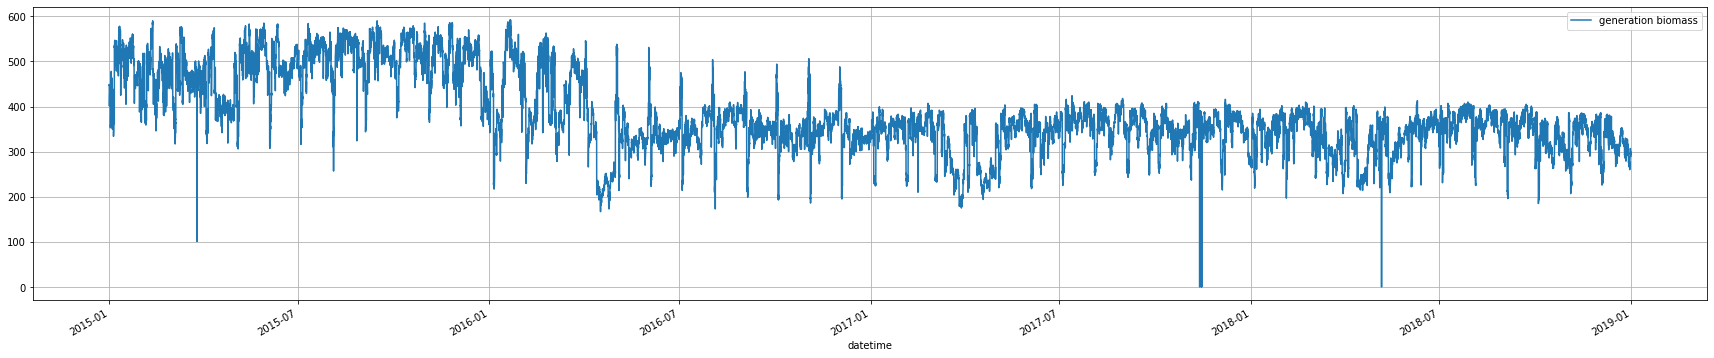

In [37]:
full_df.plot(y=['generation biomass'], figsize=(30, 6), grid=True)

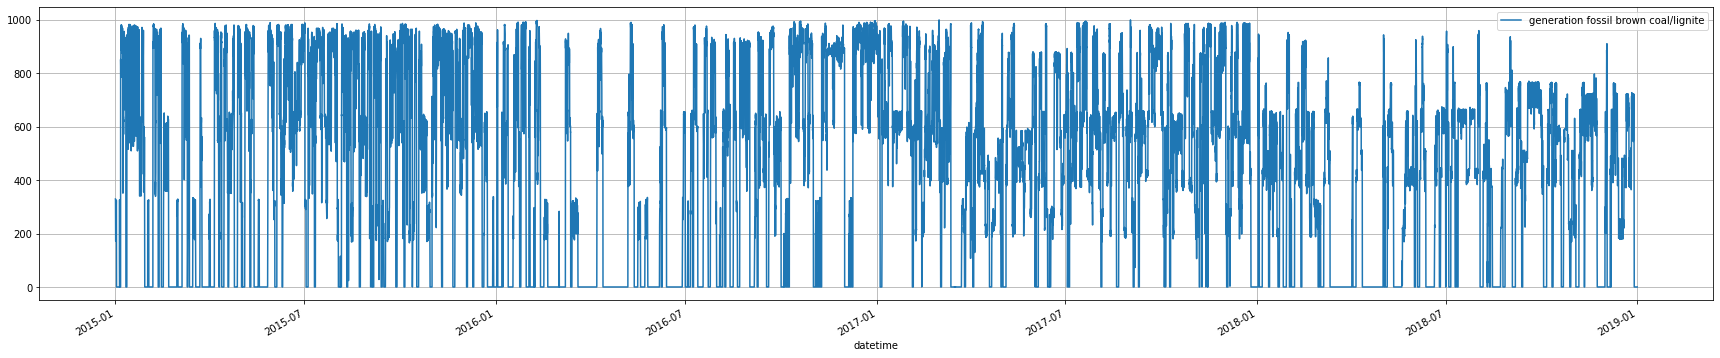

In [38]:
full_df.plot(y=['generation fossil brown coal/lignite'], figsize=(30, 6), grid=True)

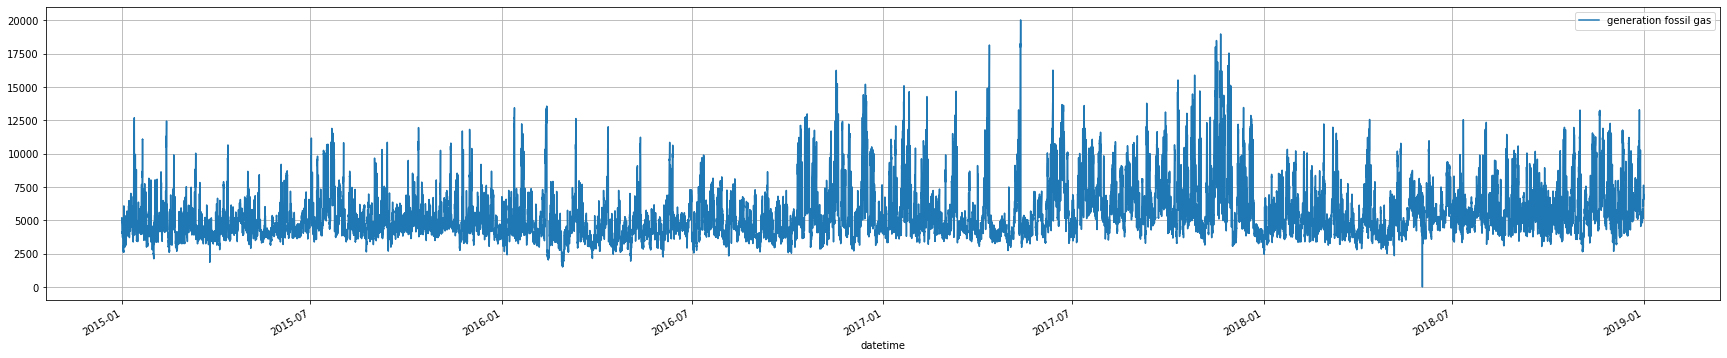

In [39]:
full_df.plot(y=['generation fossil gas'], figsize=(30, 6), grid=True)

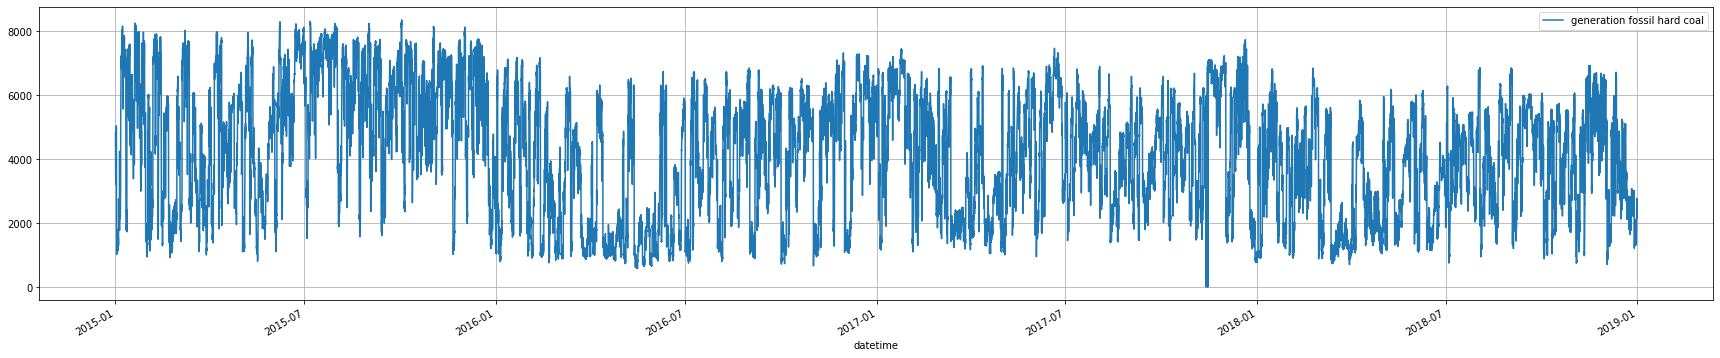

In [40]:
full_df.plot(y=['generation fossil hard coal'], figsize=(30, 6), grid=True)

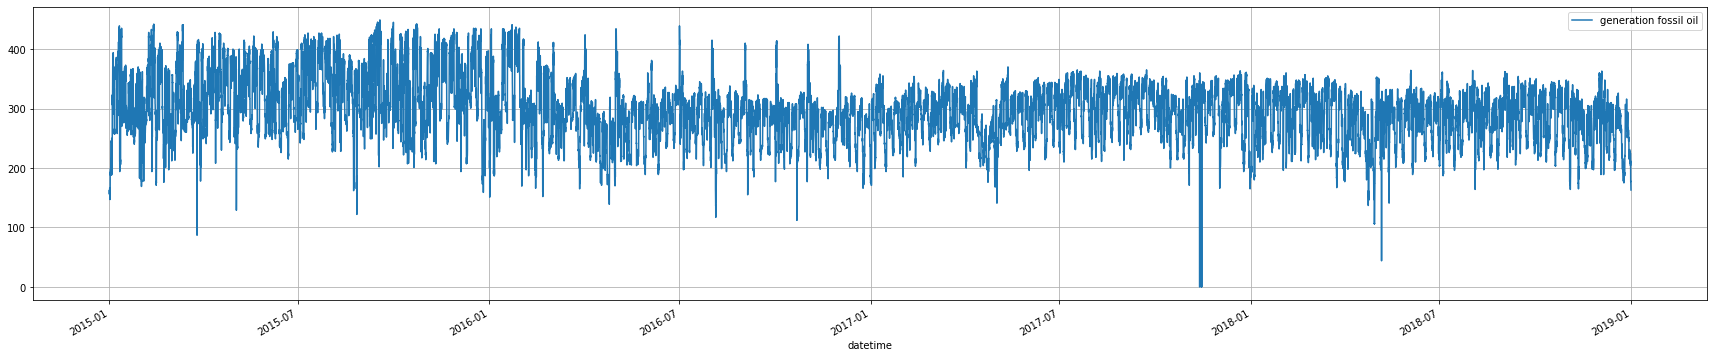

In [41]:
full_df.plot(y=['generation fossil oil'], figsize=(30,6), grid=True)

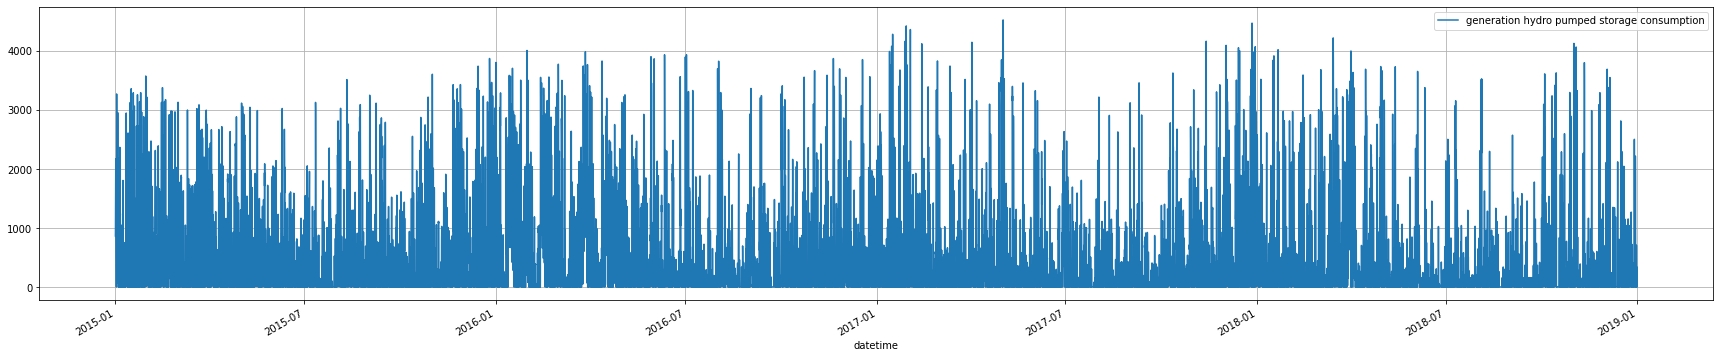

In [42]:
full_df.plot(y=['generation hydro pumped storage consumption'], figsize=(30,6), grid=True)


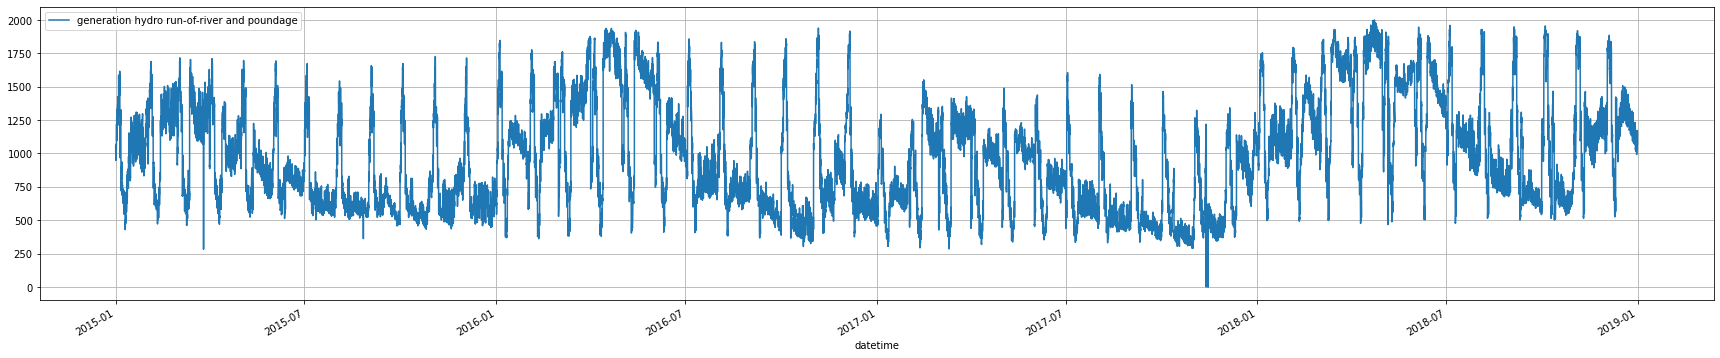

In [43]:
full_df.plot(y=['generation hydro run-of-river and poundage'], figsize=(30,6), grid=True)

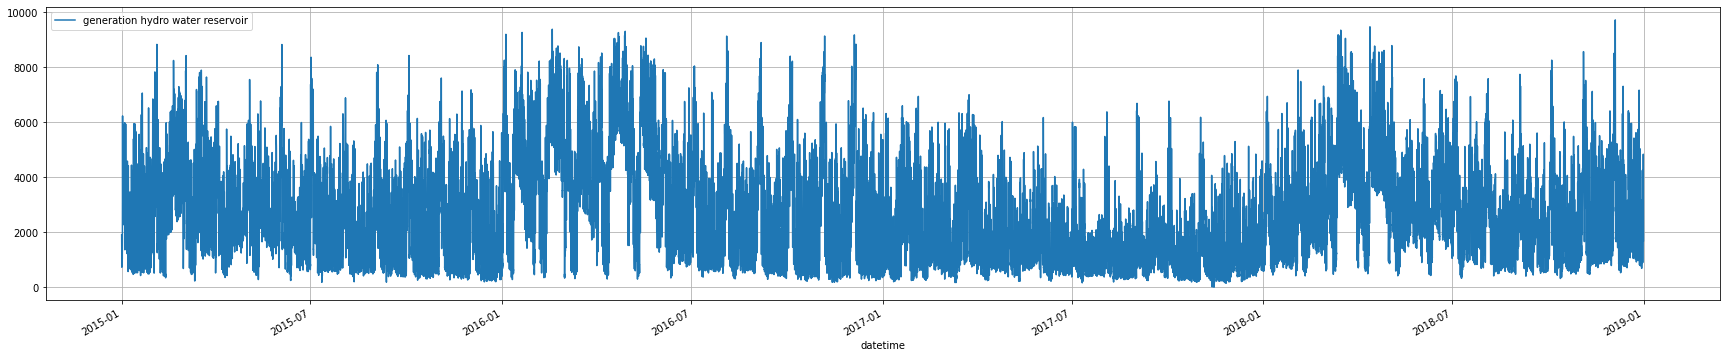

In [44]:
full_df.plot(y=['generation hydro water reservoir'], figsize=(30,6), grid=True)

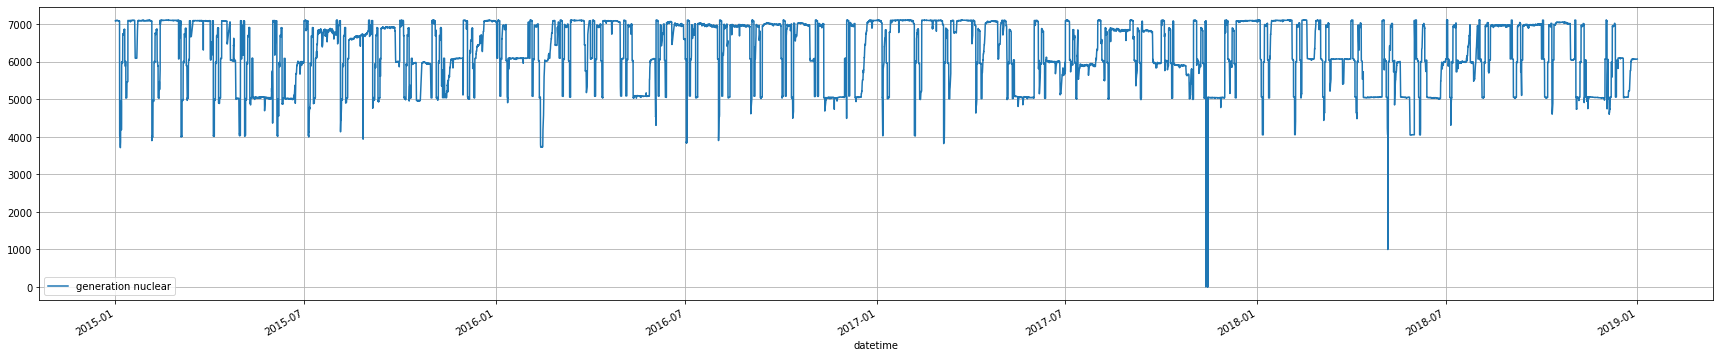

In [45]:
full_df.plot(y=['generation nuclear'], figsize=(30,6), grid=True)

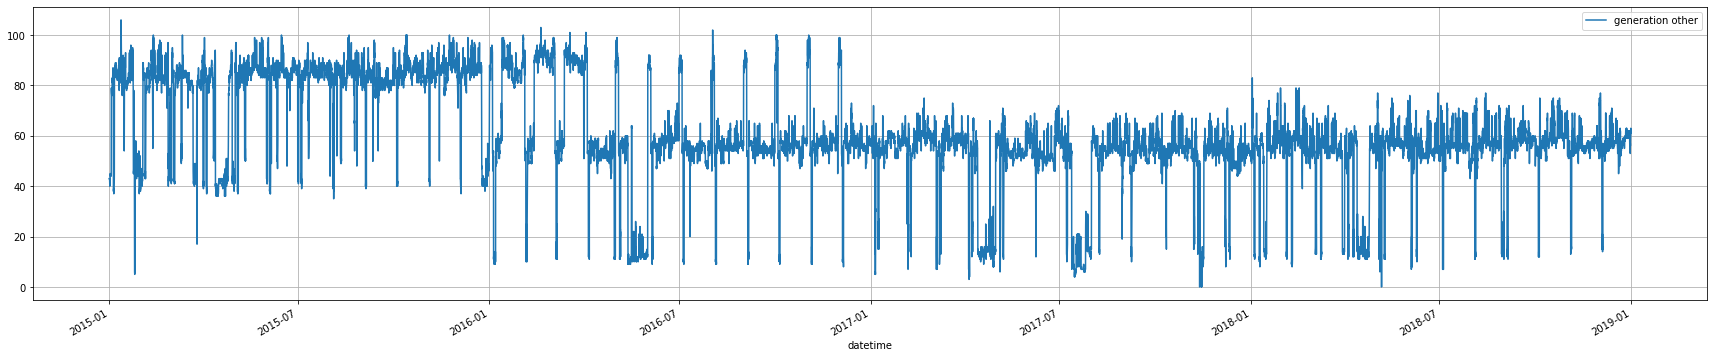

In [46]:
full_df.plot(y=['generation other'], figsize=(30,6), grid=True)

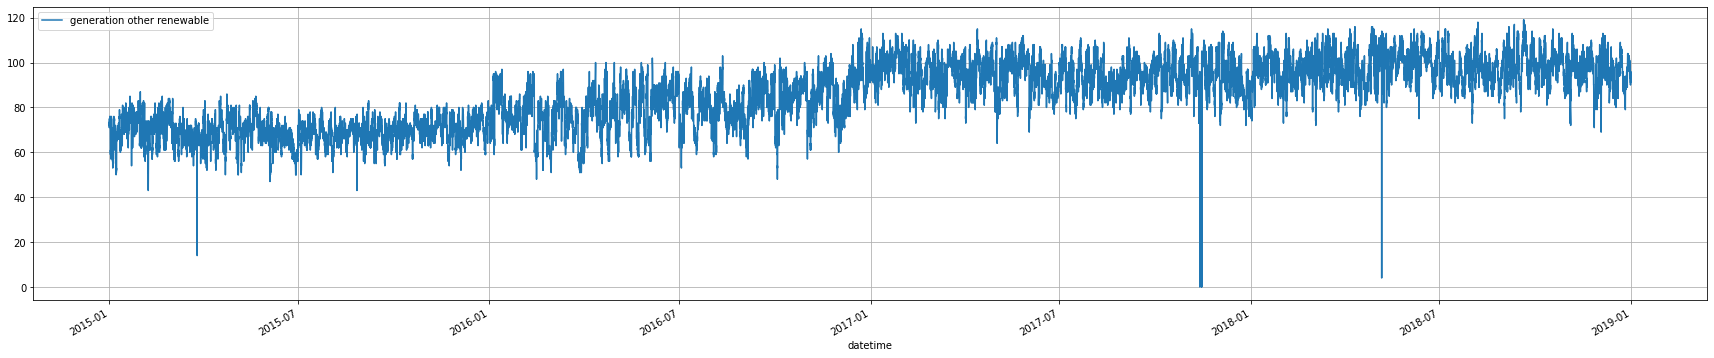

In [47]:
full_df.plot(y=['generation other renewable'], figsize=(30,6), grid=True)

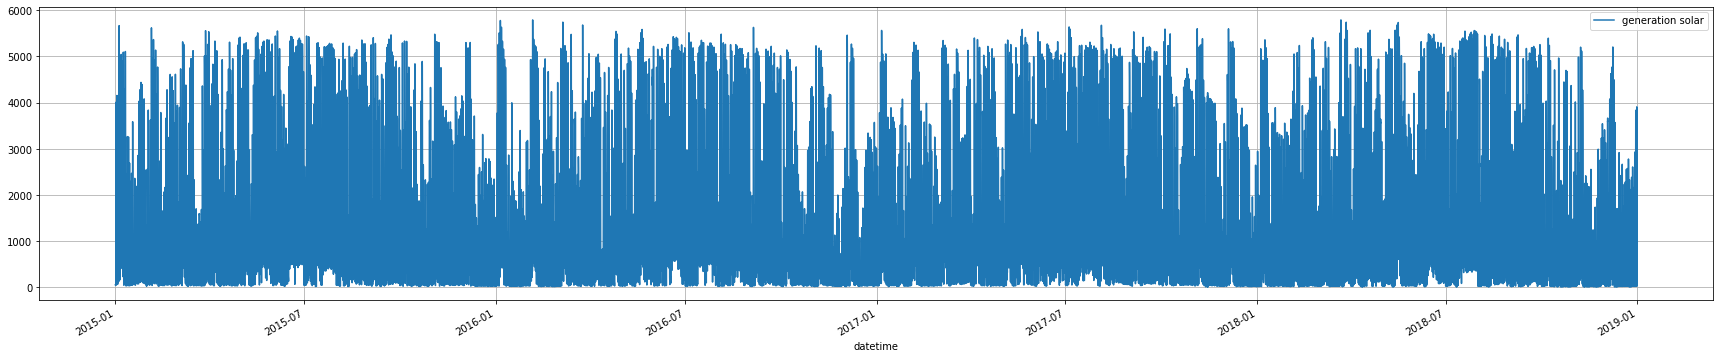

In [48]:
full_df.plot(y=['generation solar'], figsize=(30,6), grid=True)

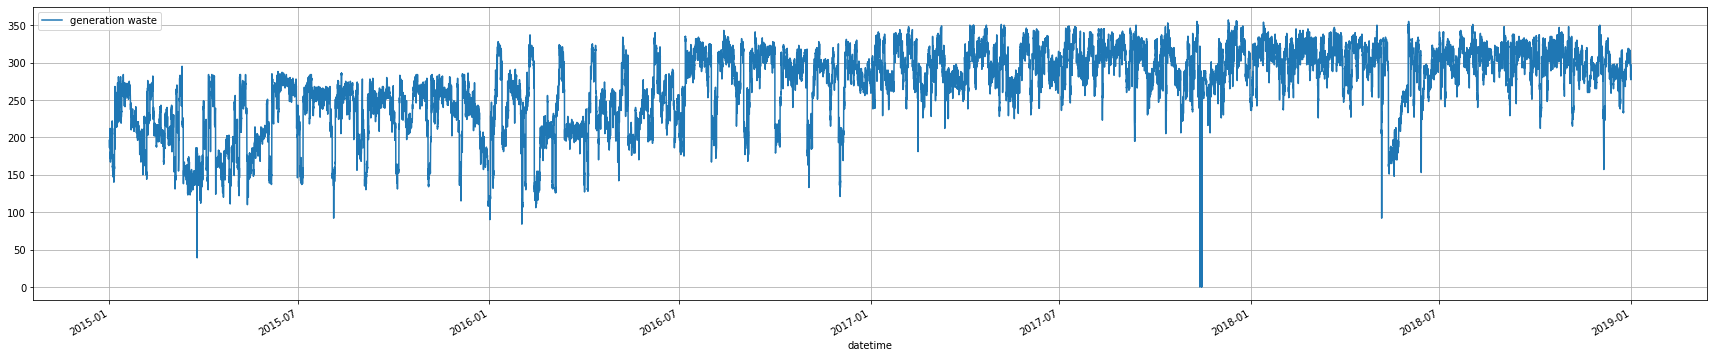

In [49]:
full_df.plot(y=['generation waste'], figsize=(30,6), grid=True)

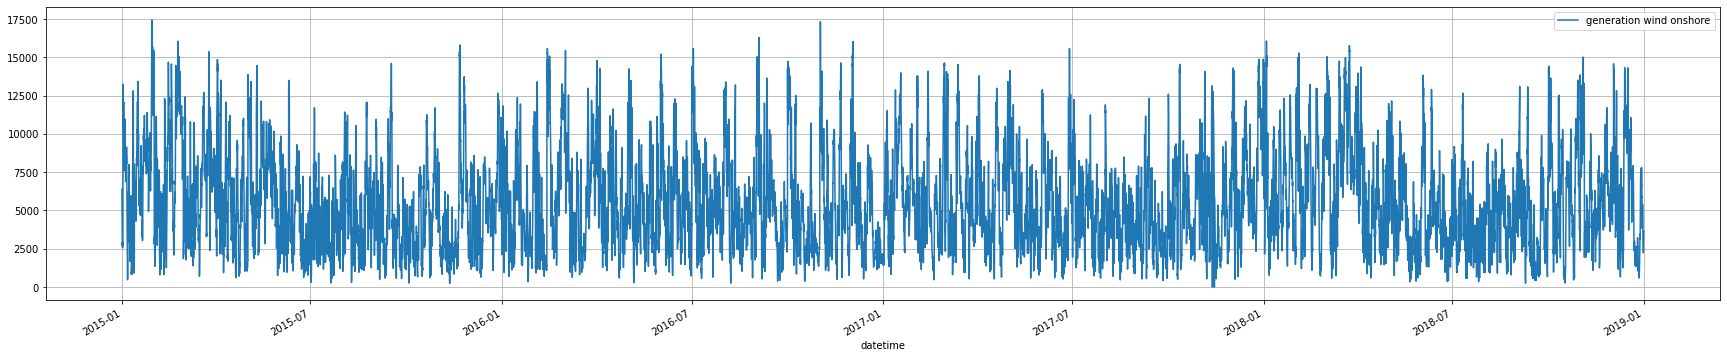

In [50]:
full_df.plot(y=['generation wind onshore'], figsize=(30,6), grid=True)

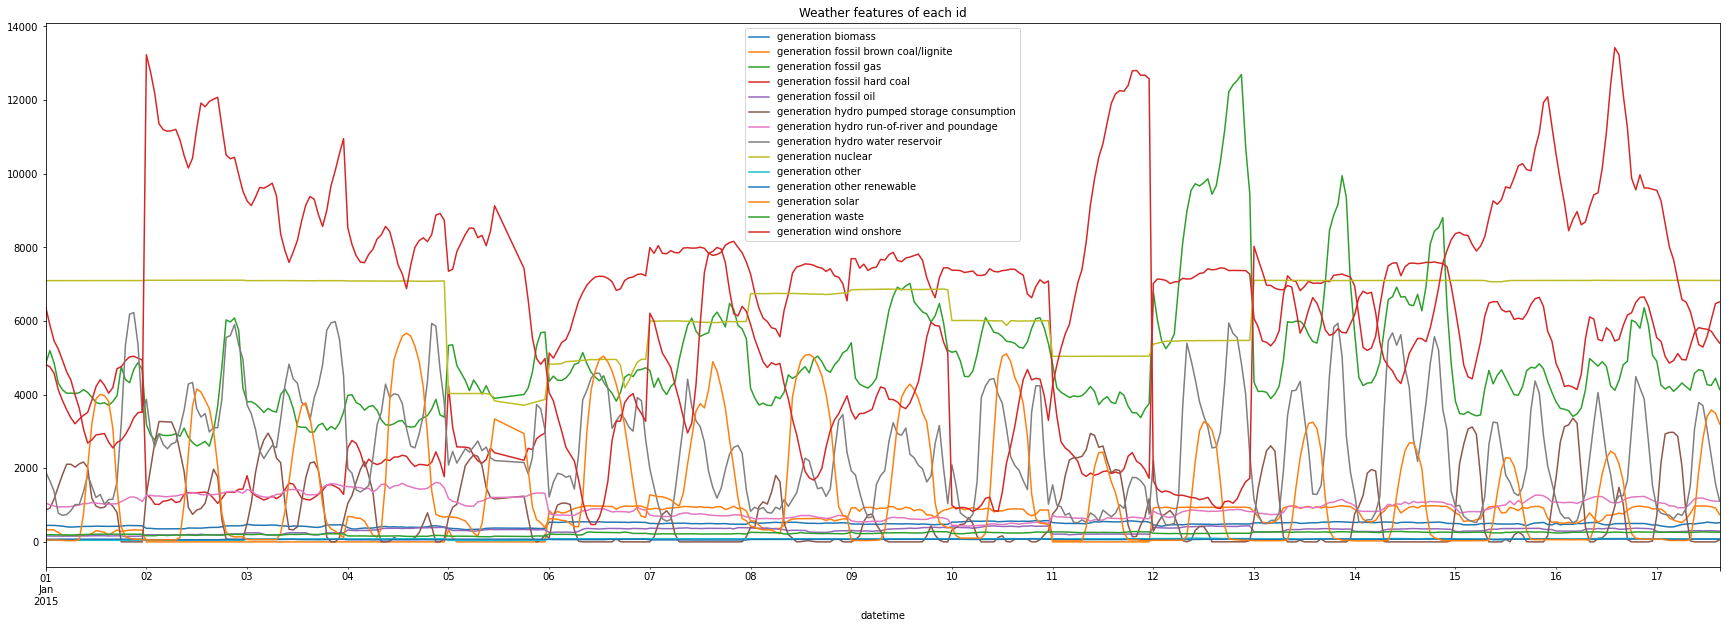

In [51]:
# to see the energy generation distribution
full_df_energy = full_df[['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas','generation fossil hard coal' ,
                   'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 
                   'generation nuclear' ,'generation other','generation other renewable','generation solar', 'generation waste','generation wind onshore']]
full_df_energy[:400].plot(figsize=(30,10),title='Weather features of each id')

+ Compare Monthly **Renewable Energy** Production 

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

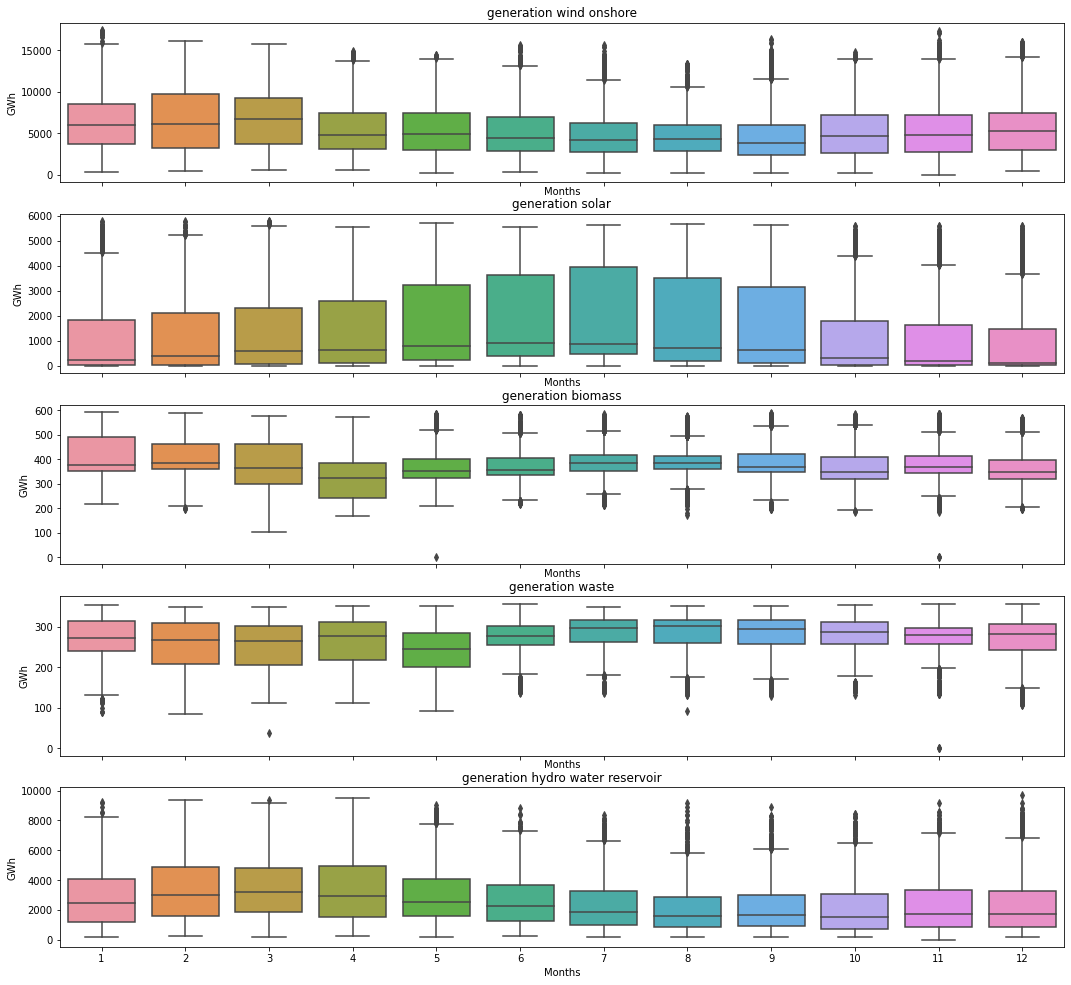

In [53]:
fig, axes=plt.subplots(5, 1, figsize=(18,17), sharex=True)
for name, ax in zip(["generation wind onshore","generation solar","generation biomass","generation waste","generation hydro water reservoir"], axes):
    sns.boxplot(data=full_df, x='month', y=name, ax=ax )
    ax.set_ylabel('GWh')
    ax.set_xlabel("Months")
    ax.set_title(name)


+ *generation solar* feature increases during the summer, especially around July to Aug and decrease during the winter seasons. 
+ However, *generation wind onshore* energy shows less seasonal variation, with high generation around March to April.
+ *generation hydro water reservoir* shows less in Aug to Oct, and more in Feb to April while *generation waste* shows the opposite result.

+ Correlation of reatures

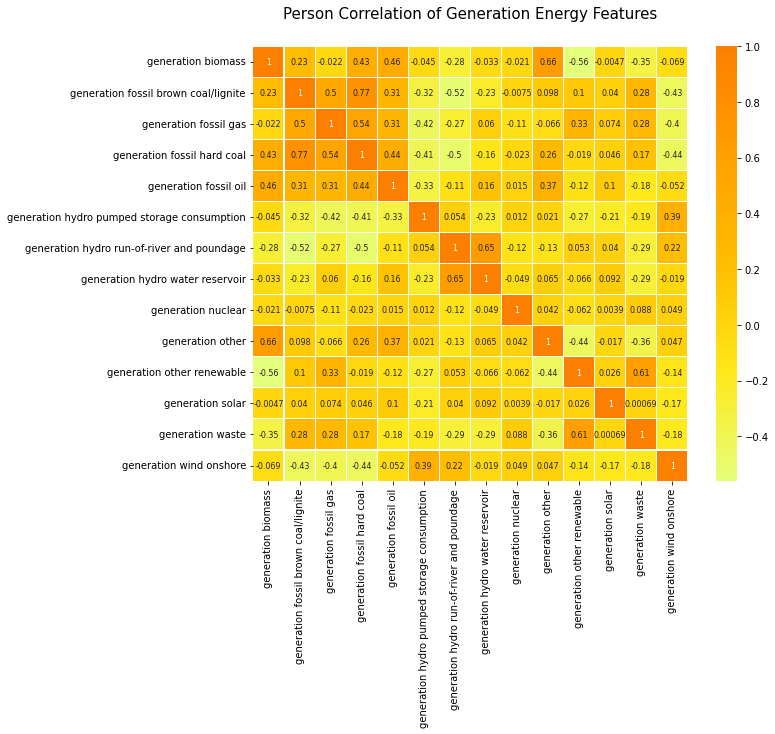

In [54]:
colormap = plt.cm.Wistia
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Generation Energy Features", y = 1.05, size = 15)
sns.heatmap(full_df_energy.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

### Weather

In [55]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

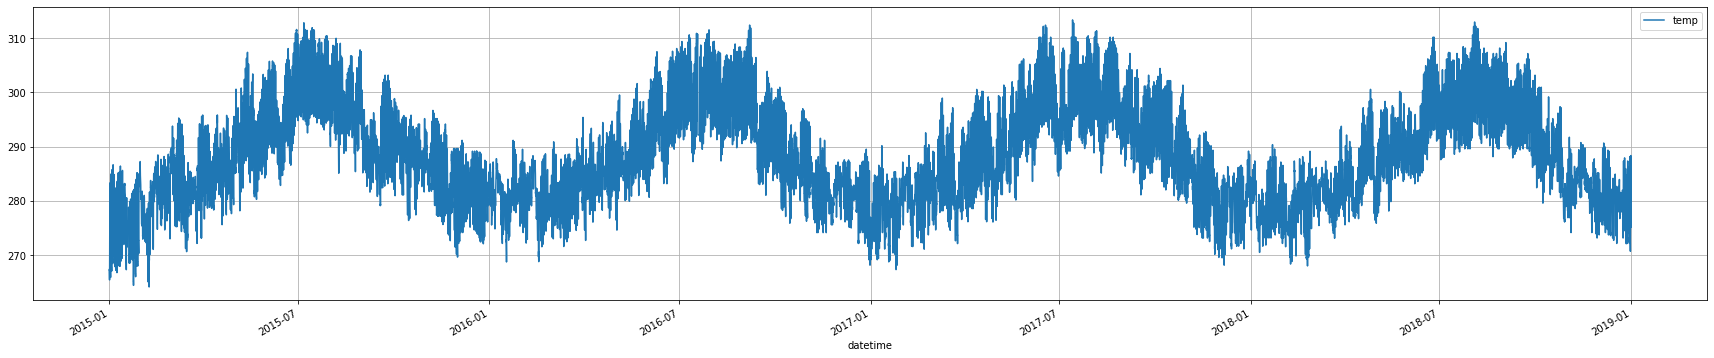

In [56]:
full_df.plot(y=['temp'], figsize=(30, 6), grid=True)

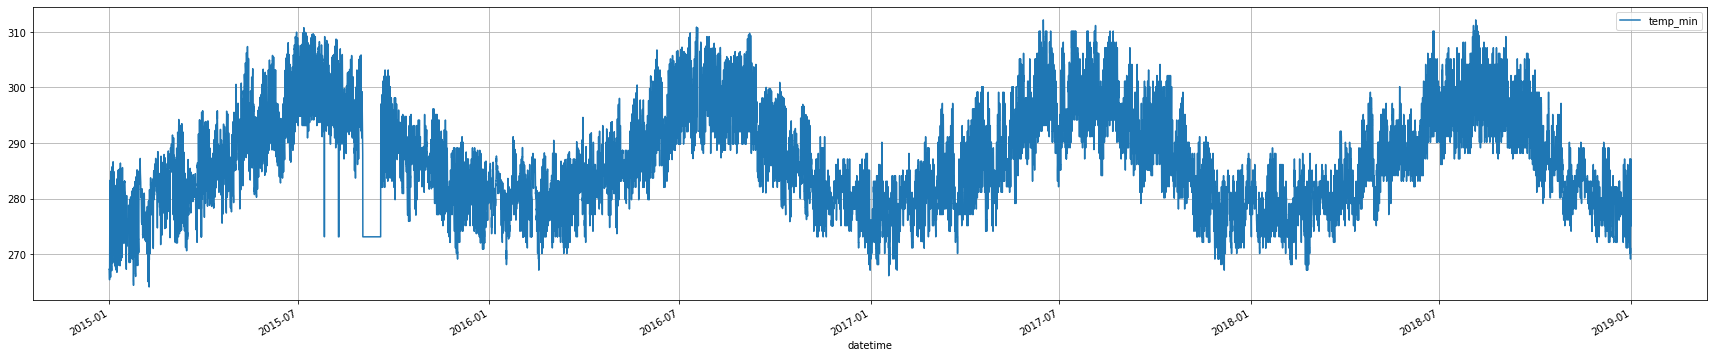

In [57]:
full_df.plot(y=['temp_min'], figsize=(30, 6), grid=True)

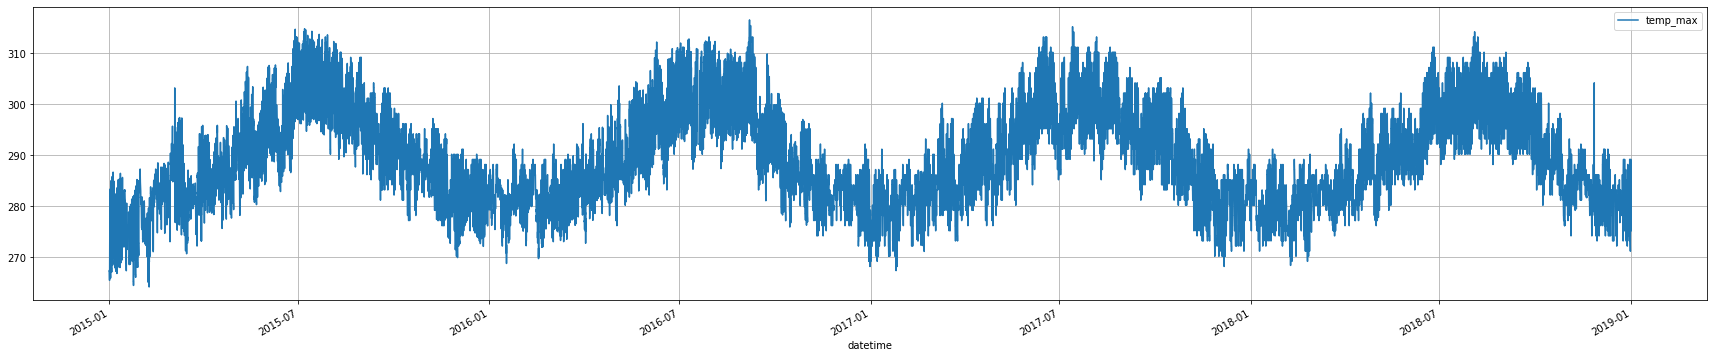

In [58]:
full_df.plot(y=['temp_max'], figsize=(30, 6), grid=True)

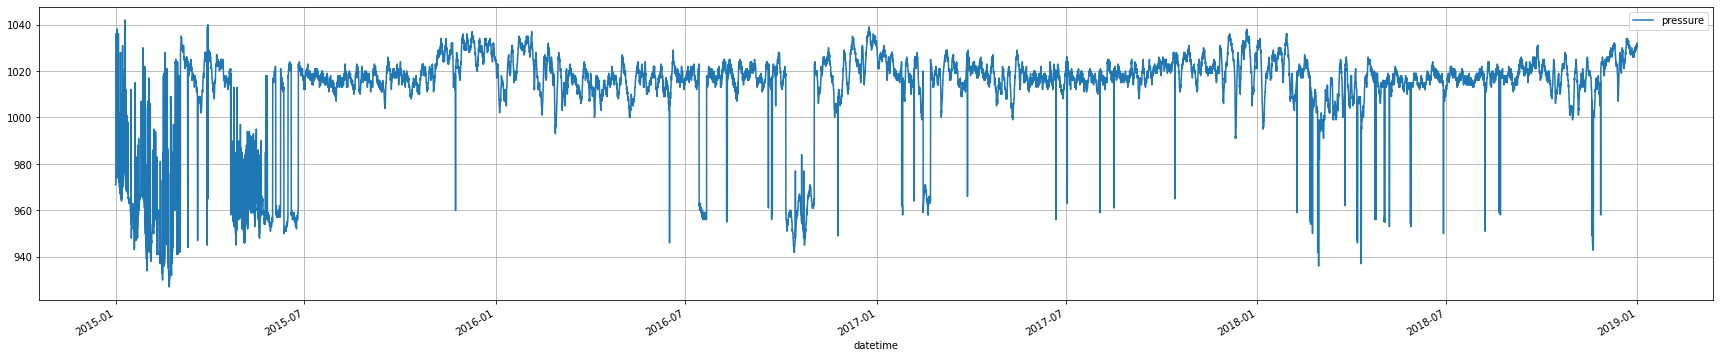

In [59]:
full_df.plot(y=['pressure'], figsize=(30, 6), grid=True)

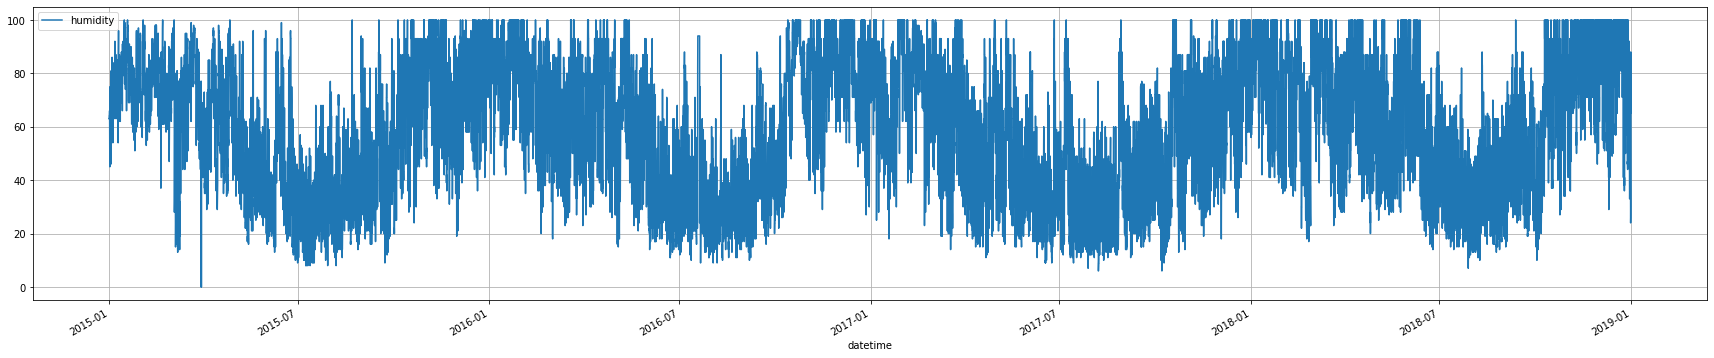

In [60]:
full_df.plot(y=['humidity'], figsize=(30, 6), grid=True)

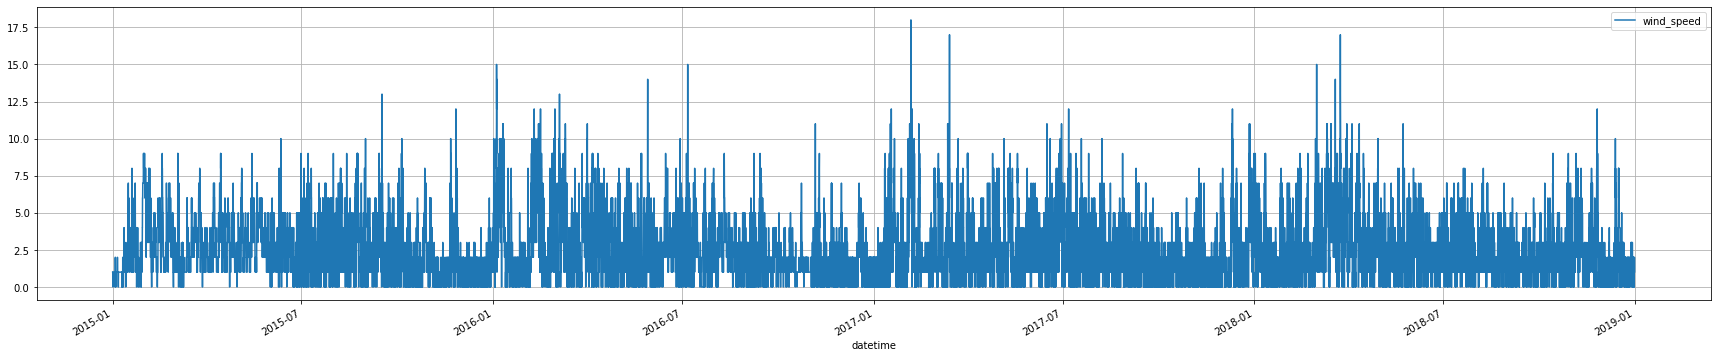

In [61]:
full_df.plot(y=['wind_speed'], figsize=(30, 6), grid=True)

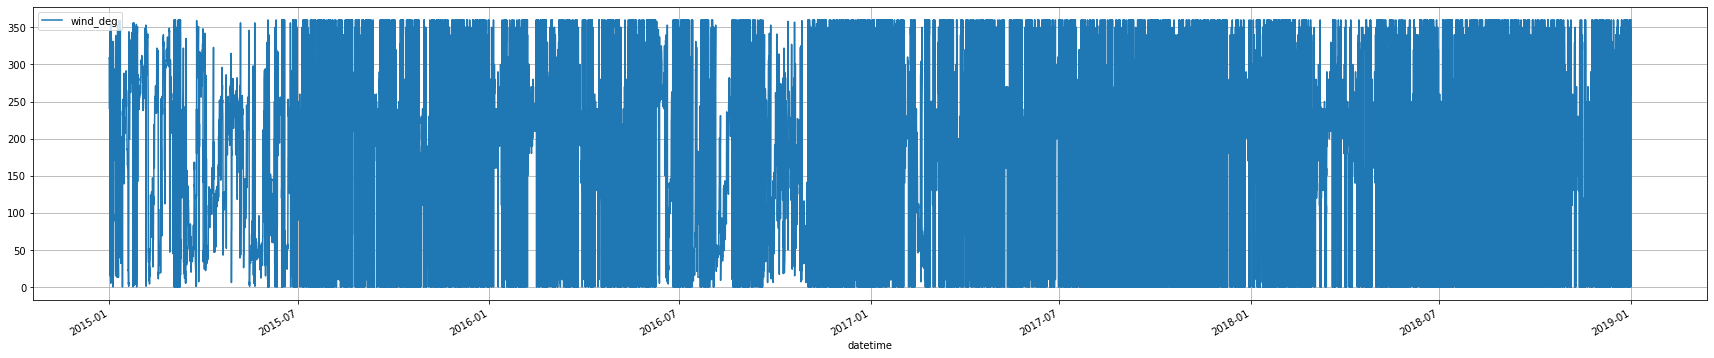

In [62]:
full_df.plot(y=['wind_deg'], figsize=(30, 6), grid=True)

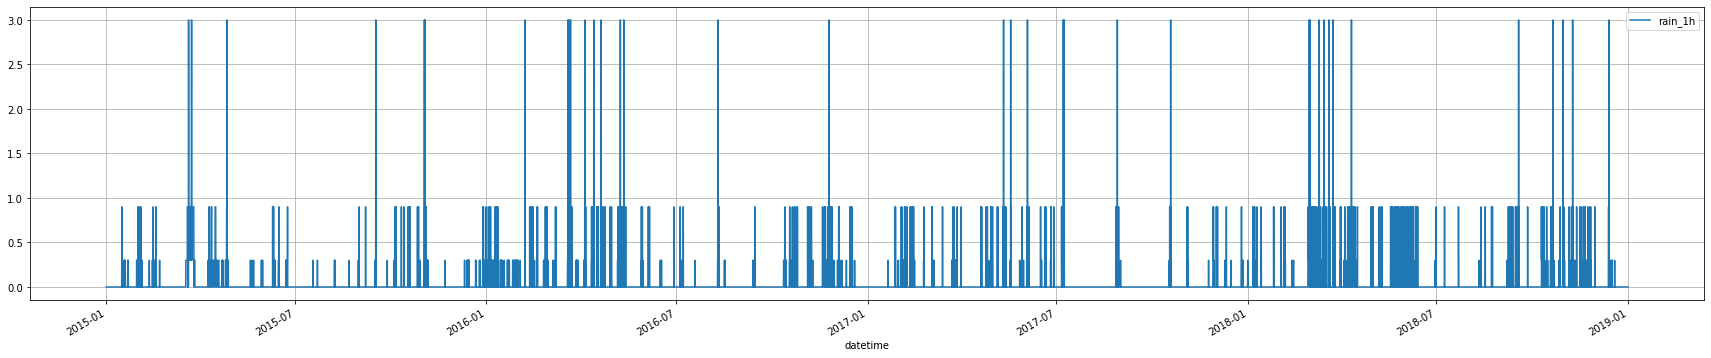

In [63]:
full_df.plot(y=['rain_1h'], figsize=(30, 6), grid=True)

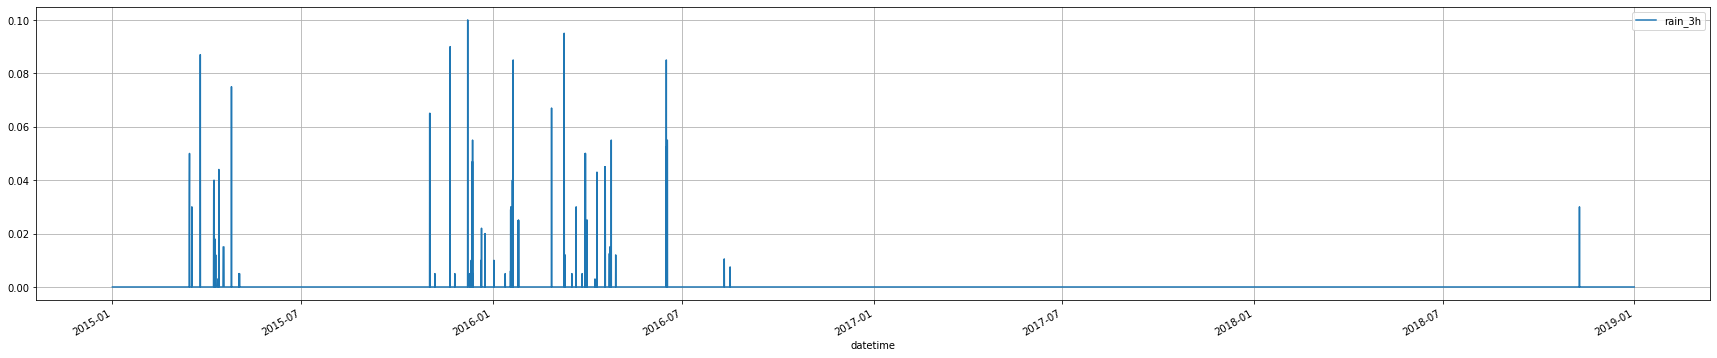

In [64]:
full_df.plot(y=['rain_3h'], figsize=(30, 6), grid=True)

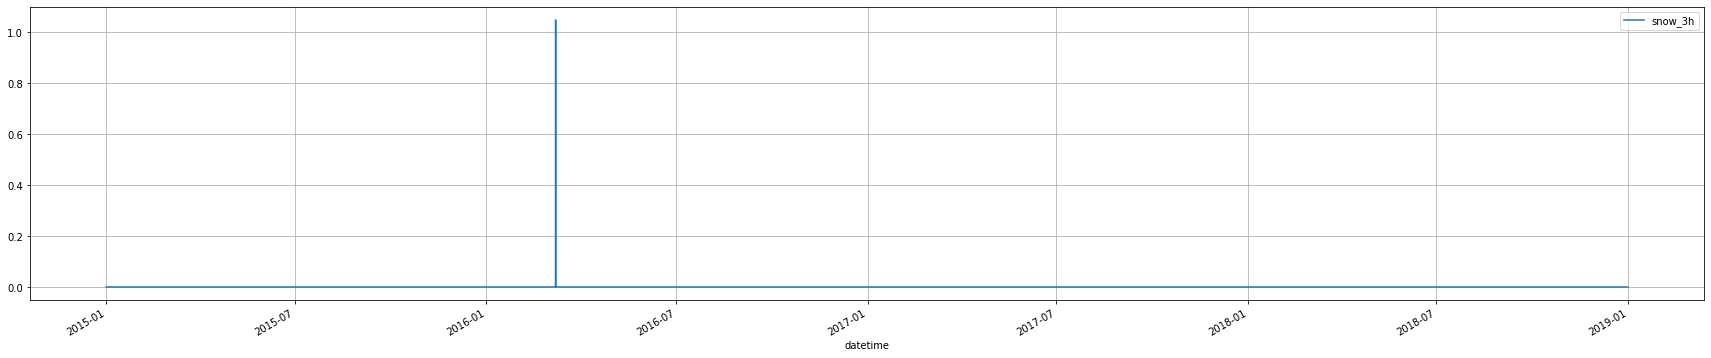

In [65]:
full_df.plot(y=['snow_3h'], figsize=(30, 6), grid=True)

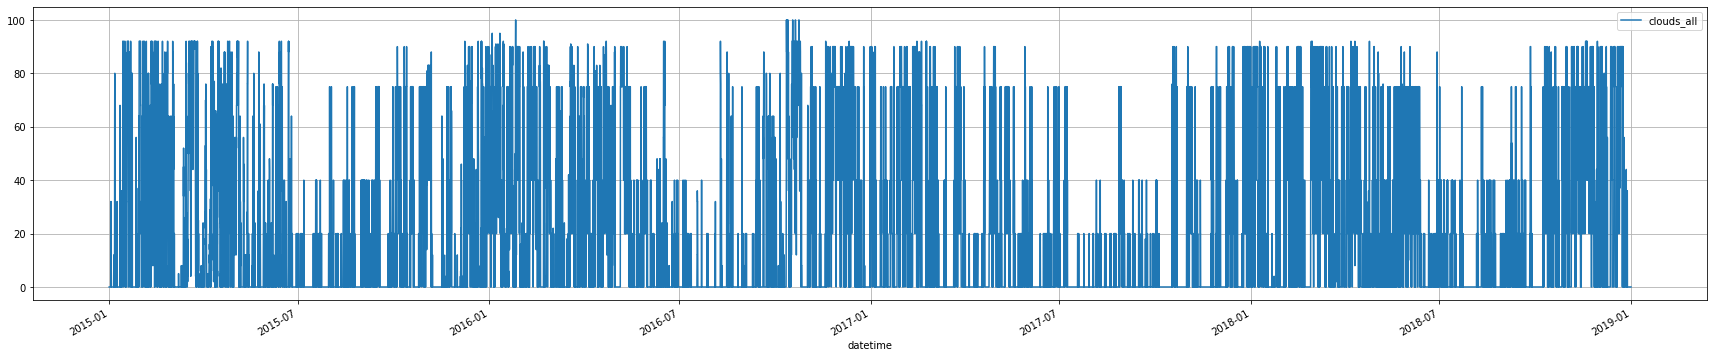

In [66]:
full_df.plot(y=['clouds_all'], figsize=(30, 6), grid=True)

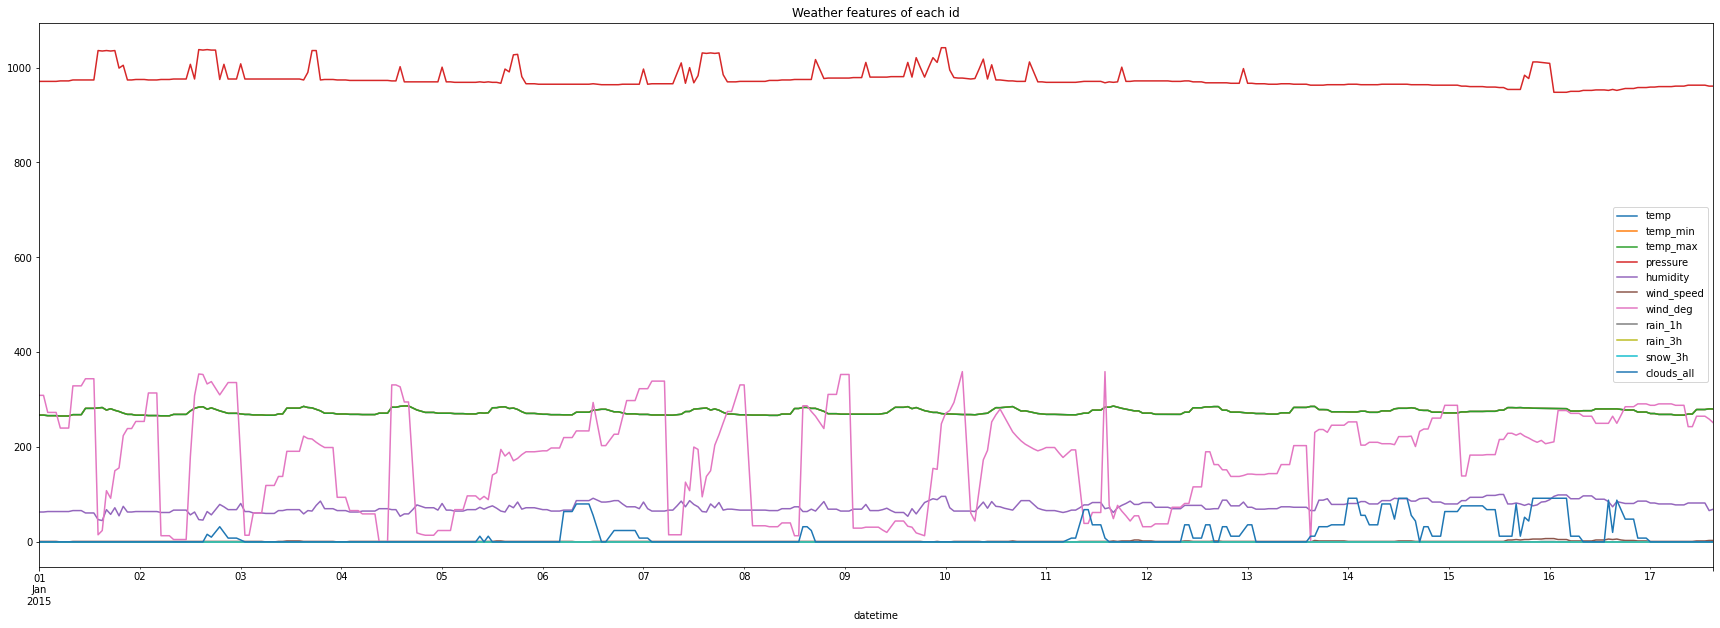

In [67]:
full_df_weather=full_df[['temp','temp_min','temp_max','pressure', 'humidity' ,'wind_speed','wind_deg', 'rain_1h',
                         'rain_3h','snow_3h' ,'clouds_all']]
full_df_weather[:400].plot(figsize=(30,10),title='Weather features of each id')

+ Weather data features

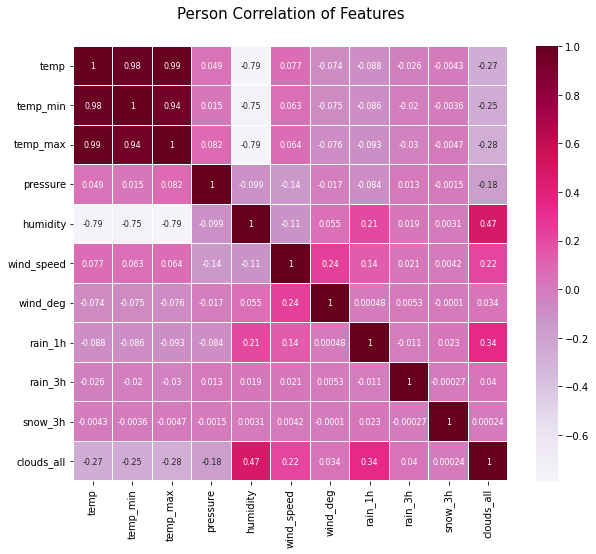

In [68]:
colormap = plt.cm.PuRd
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(full_df_weather.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})


## 3. Find correlation between generated energy type and 'price'

In [69]:
# Identify the correlation between the target variable and the input variable and select the top 10
data_corr = full_df.corr()
data_corr = data_corr.sort_values(by=['price actual'],axis=1, ascending=False)
data_corr = data_corr.iloc[range(20),0]
data_corr = data_corr.sort_values(ascending = False)
data_corr = data_corr.iloc[0:20]
print(data_corr)

price actual                                   1.000000
price day ahead                                0.732151
generation fossil hard coal                    0.465643
generation fossil gas                          0.461448
total load forecast                            0.435888
total load actual                              0.435283
generation fossil brown coal/lignite           0.364008
generation fossil oil                          0.285051
generation other renewable                     0.255562
generation waste                               0.168723
generation biomass                             0.142696
forecast solar day ahead                       0.101379
generation other                               0.099931
generation solar                               0.098505
generation hydro water reservoir               0.071874
generation nuclear                            -0.053036
generation hydro run-of-river and poundage    -0.136723
generation wind onshore                       -0

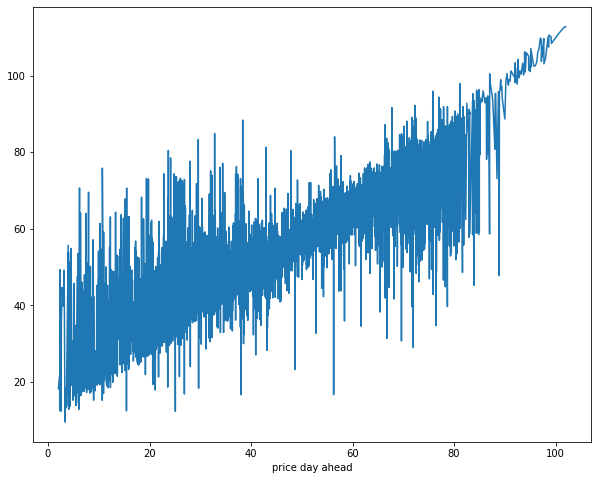

In [70]:
# plot for price day ahead  
fig = plt.figure(figsize=(10,8))
full_df.groupby('price day ahead')['price actual'].mean().plot() # since price day ahead is prediction for the actual price, I will remove this column.

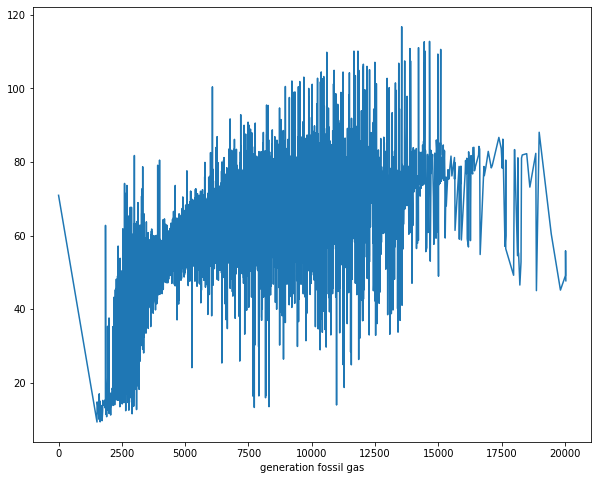

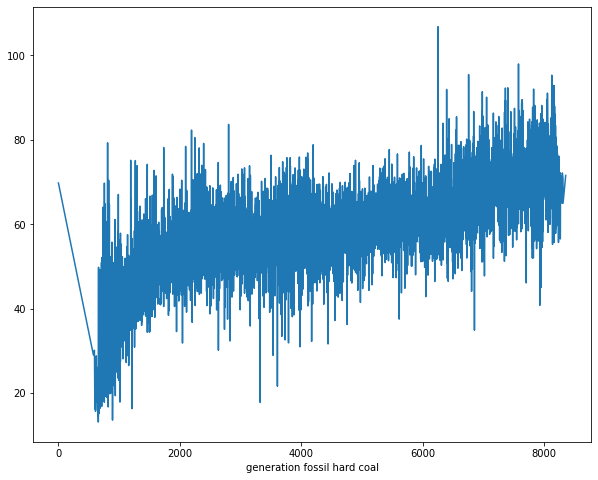

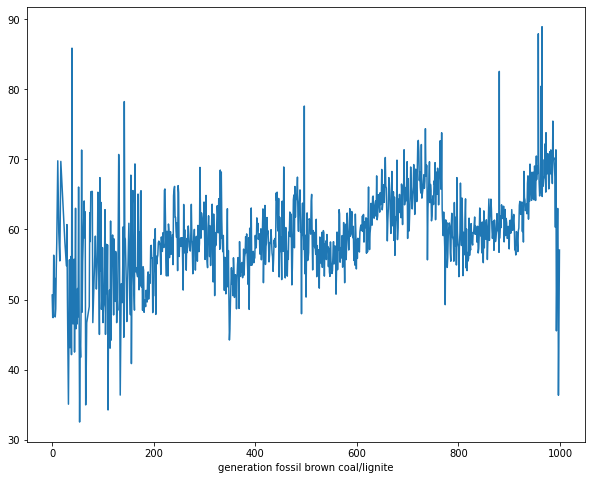

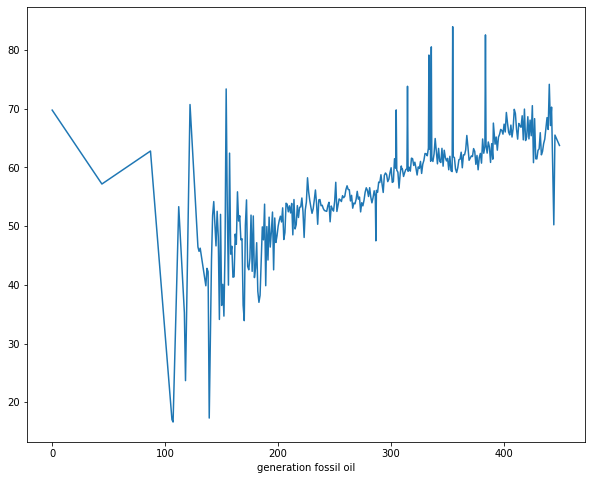

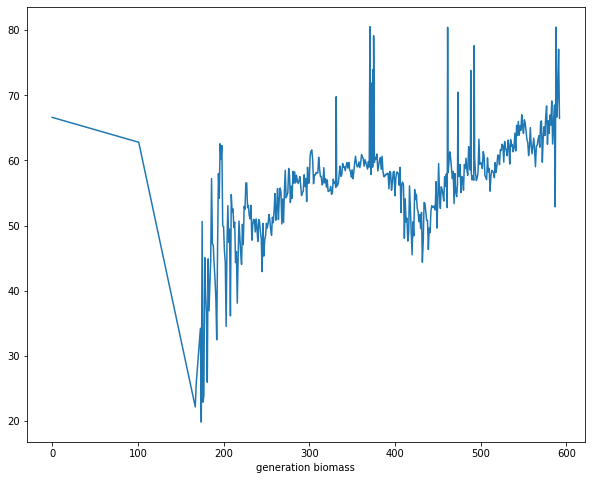

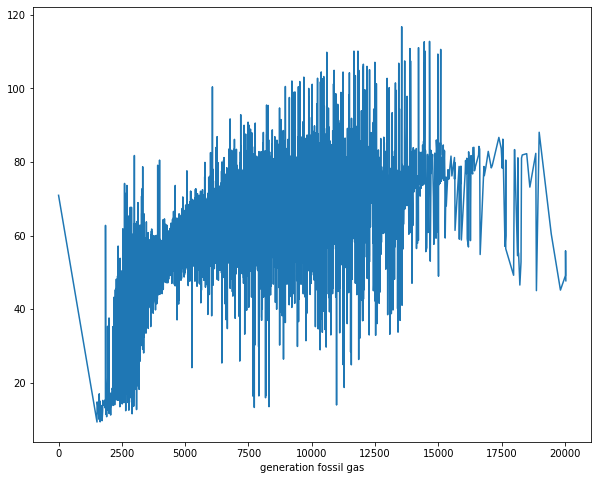

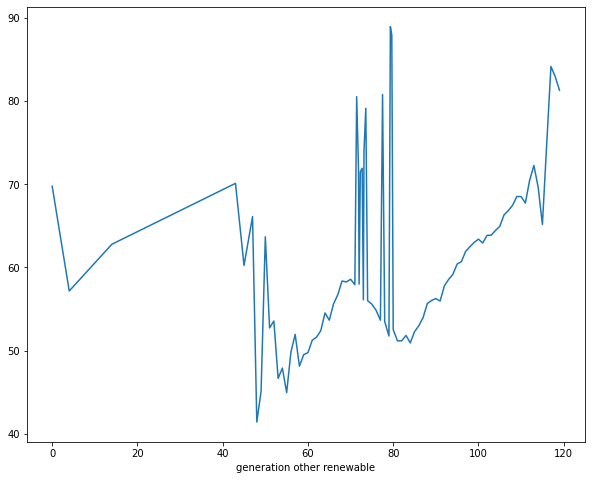

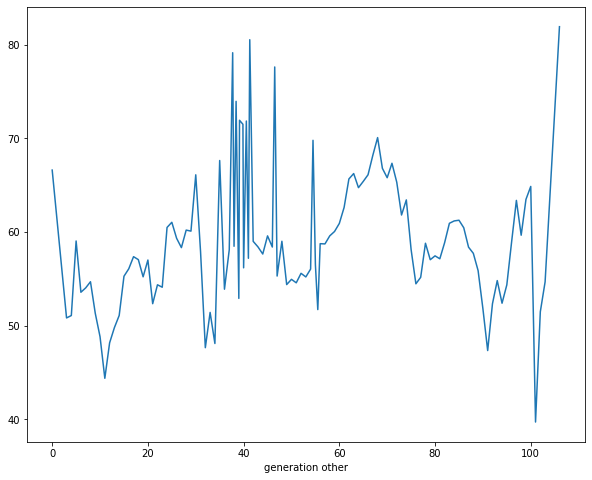

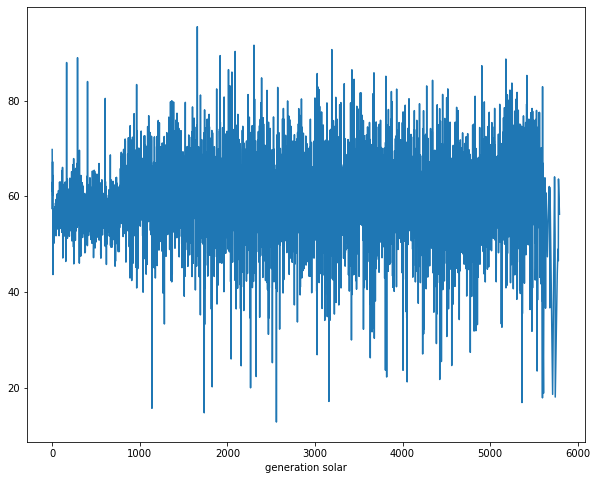

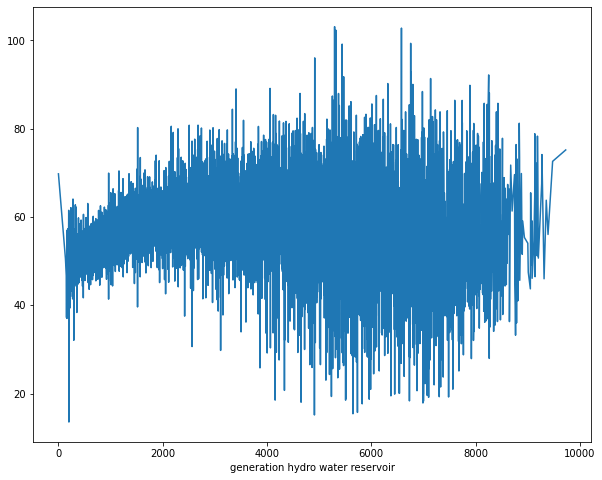

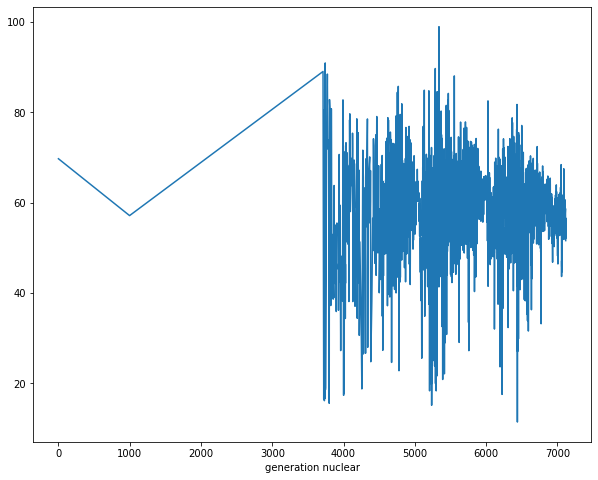

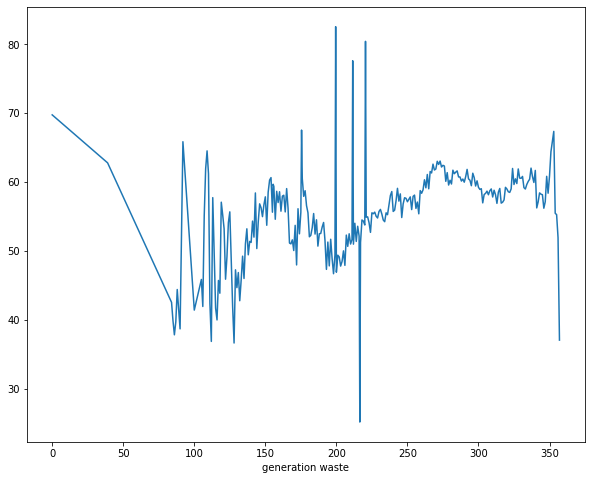

In [71]:
# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation fossil hard coal 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil hard coal')['price actual'].mean().plot()

# plot for generation fossil brown coal/lignite
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil brown coal/lignite')['price actual'].mean().plot()

# plot for generation fossil oil
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil oil')['price actual'].mean().plot()

# plot for generation biomass
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation biomass')['price actual'].mean().plot()

# plot for generation fossil gas 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation fossil gas')['price actual'].mean().plot()

# plot for generation other renewable
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation other renewable')['price actual'].mean().plot()

# plot for generation other
fig = plt.figure(figsize=(10,8))
energy.groupby('generation other')['price actual'].mean().plot()

# plot for generation solar 
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation solar')['price actual'].mean().plot()

# plot for generation hydro water reservoir
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation hydro water reservoir')['price actual'].mean().plot()

# plot for generation nuclear
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation nuclear')['price actual'].mean().plot()

# plot for generation waste
fig = plt.figure(figsize=(10,8))
full_df.groupby('generation waste')['price actual'].mean().plot()

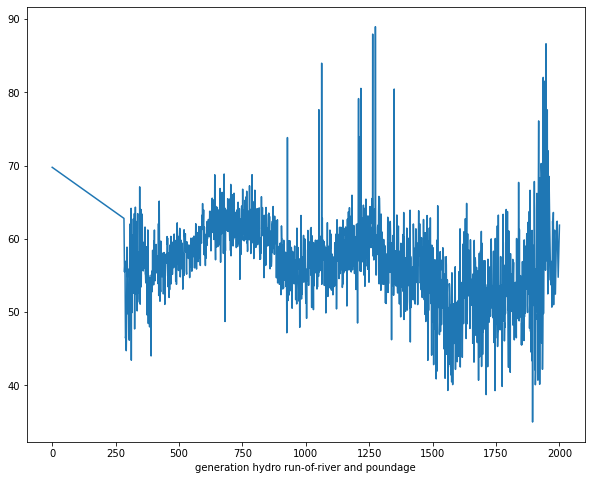

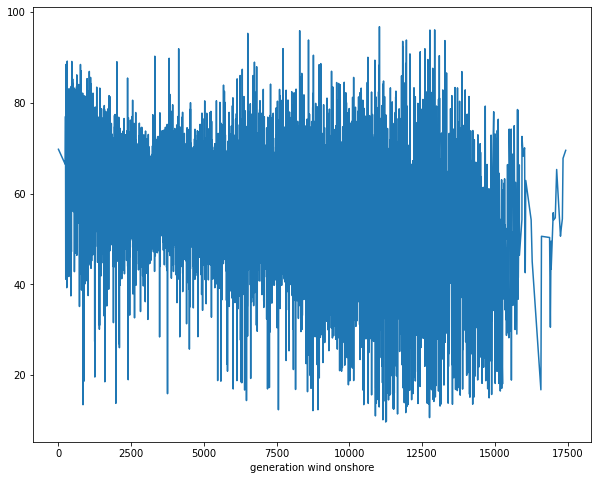

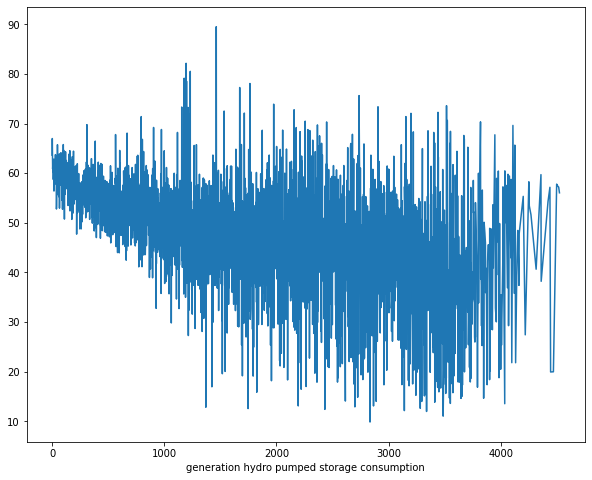

In [72]:
# plot for generation hydro run-of-river and poundage
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro run-of-river and poundage')['price actual'].mean().plot()

# plot for generation wind onshore
fig = plt.figure(figsize=(10,8))
energy.groupby('generation wind onshore')['price actual'].mean().plot()

# plot for generation hydro pumped storage consumption
fig = plt.figure(figsize=(10,8))
energy.groupby('generation hydro pumped storage consumption')['price actual'].mean().plot()

# Feature engineering


In [73]:
full_df.dtypes

generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation hydro pumped storage consumption    float64
generation hydro run-of-river and poundage     float64
generation hydro water reservoir               float64
generation nuclear                             float64
generation other                               float64
generation other renewable                     float64
generation solar                               float64
generation waste                               float64
generation wind onshore                        float64
forecast solar day ahead                       float64
forecast wind onshore day ahead                float64
total load forecast                            float64
total load actual                              float64
price day 

In [74]:
full_df2 = full_df.copy()

In [75]:
full_df2 = full_df2.drop(['generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil'], axis=1)

+ hydro generation 데이터 3개 중에서는 price와 correlation 이 negative하게 나타났던 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption'을 제거하였다.
+ renewable energy 가 아닌 generation nuclear와 generation other 컬럼도 제거하였다. 

In [76]:
full_df2 = full_df2.drop([ 'generation hydro run-of-river and poundage','generation hydro pumped storage consumption','generation nuclear','generation other'],axis=1)

In [77]:
full_df2.dtypes

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
forecast solar day ahead            float64
forecast wind onshore day ahead     float64
total load forecast                 float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
temp_min                            float64
temp_max                            float64
pressure                              int64
humidity                              int64
wind_speed                            int64
wind_deg                              int64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                      

## Make new csv file

In [78]:
full_df2 = full_df2.drop([ 'total load forecast', 'temp_min', 'temp_max', 'forecast solar day ahead','forecast wind onshore day ahead'], axis = 1)
# full_df2.to_csv('semifinal_dataset.csv')

In [79]:
# make fossil dataframe
fossil_full_df = full_df.copy()
fossil_full_df = fossil_full_df.drop([  'total load forecast', 'temp_min', 'temp_max', 'forecast solar day ahead','forecast wind onshore day ahead'], axis = 1)


In [80]:
full_df2.dtypes
renewable_full_df = full_df2.copy()

In [81]:
 # Set conditional satements for filtering times of month to season value
condition_winter = (renewable_full_df.index.month>=1)&(renewable_full_df.index.month<=3)
condtion_spring = (renewable_full_df.index.month>=4)&(renewable_full_df.index.month<=6)
condition_summer = (renewable_full_df.index.month>=7)&(renewable_full_df.index.month<=9)
condition_automn = (renewable_full_df.index.month>=10)&(renewable_full_df.index.month<=12)

# Create column in dataframe that inputs the season based on the conditions created above
renewable_full_df['season'] = np.where(condition_winter,'winter',
                        np.where(condtion_spring,'spring',
                        np.where(condition_summer,'summer',
                        np.where(condition_automn,'autumn',np.nan))))

In [82]:
renewable_full_df.dtypes

generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
pressure                              int64
humidity                              int64
wind_speed                            int64
wind_deg                              int64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                            int64
year                                  int64
month                                 int64
day                                   int64
hour                                  int64
season                          

In [83]:
fossil_df = fossil_full_df.copy()
 # Set conditional satements for filtering times of month to season value
condition_winter = (fossil_df.index.month>=1)&(fossil_df.index.month<=3)
condtion_spring = (fossil_df.index.month>=4)&(fossil_df.index.month<=6)
condition_summer = (fossil_df.index.month>=7)&(fossil_df.index.month<=9)
condition_automn = (fossil_df.index.month>=10)&(fossil_df.index.month<=12)

In [84]:
# fossil_df.dtypes
fossil_full_df = fossil_full_df.drop([ 'generation wind onshore', 'generation biomass', 
                                      'generation hydro pumped storage consumption', 
                                      'generation hydro run-of-river and poundage', 
                                      'generation hydro water reservoir',
                                      'generation other renewable','generation solar',
                                      'generation waste'], axis = 1)
fossil_full_df.dtypes

generation fossil brown coal/lignite    float64
generation fossil gas                   float64
generation fossil hard coal             float64
generation fossil oil                   float64
generation nuclear                      float64
generation other                        float64
total load actual                       float64
price day ahead                         float64
price actual                            float64
temp                                    float64
pressure                                  int64
humidity                                  int64
wind_speed                                int64
wind_deg                                  int64
rain_1h                                 float64
rain_3h                                 float64
snow_3h                                 float64
clouds_all                                int64
year                                      int64
month                                     int64
day                                     

### Draw plot for seasonal renewable eneargy generation

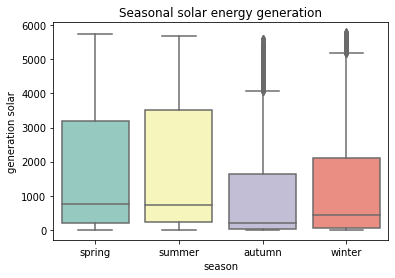

season
autumn     9038757.5
spring    14905988.0
summer    15722968.0
winter    10572538.0
Name: generation solar, dtype: float64


In [85]:
df_season_solar = renewable_full_df.groupby("season")["generation solar"].sum()
sns.boxplot(x="season", y="generation solar", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal solar energy generation")
plt.show()
print(df_season_solar)

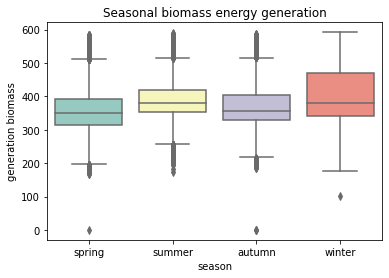

season
autumn    3357876.0
spring    3149548.5
summer    3523015.5
winter    3416163.0
Name: generation biomass, dtype: float64


In [86]:
df_season_biomass = renewable_full_df.groupby("season")["generation biomass"].sum()
sns.boxplot(x="season", y="generation biomass", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal biomass energy generation")
plt.show()
print(df_season_biomass)

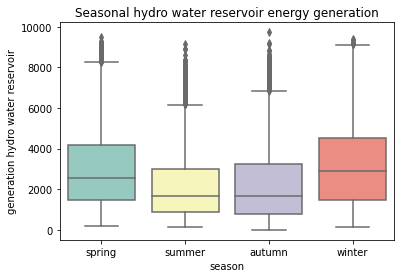

season
autumn    19208438.5
spring    25984014.5
summer    18717716.5
winter    27448524.0
Name: generation hydro water reservoir, dtype: float64


In [87]:
df_season_hydro= renewable_full_df.groupby("season")["generation hydro water reservoir"].sum()
sns.boxplot(x="season", y="generation hydro water reservoir", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal hydro water reservoir energy generation")
plt.show()
print(df_season_hydro)

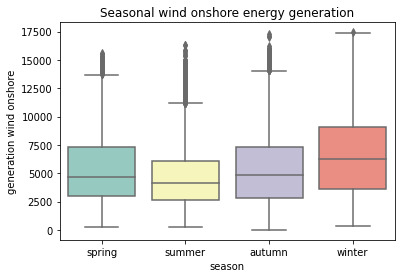

season
autumn    47766685.5
spring    46406373.0
summer    40610748.5
winter    56819424.5
Name: generation wind onshore, dtype: float64


In [88]:
df_season_wind= renewable_full_df.groupby("season")["generation wind onshore"].sum()
sns.boxplot(x="season", y="generation wind onshore", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal wind onshore energy generation")
plt.show()
print(df_season_wind)

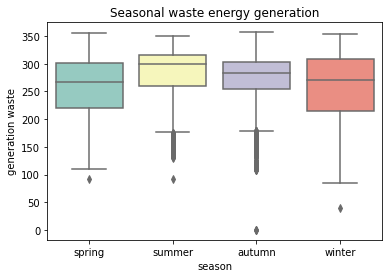

season
autumn    2422499.5
spring    2267771.5
summer    2515508.0
winter    2239942.0
Name: generation waste, dtype: float64


In [89]:
df_season_waste = renewable_full_df.groupby("season")["generation waste"].sum()
sns.boxplot(x="season", y="generation waste", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal waste energy generation")
plt.show()
print(df_season_waste)

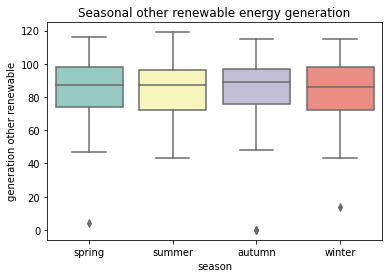

season
autumn    769681.0
spring    750289.0
summer    750085.0
winter    732271.0
Name: generation other renewable, dtype: float64


In [90]:
df_season_other_renewable = renewable_full_df.groupby("season")["generation other renewable"].sum()
sns.boxplot(x="season", y="generation other renewable", palette='Set3',data=renewable_full_df, order =["spring", "summer", "autumn", "winter"])
plt.title("Seasonal other renewable energy generation")
plt.show()
print(df_season_other_renewable)

In [91]:
### make csv
renewable_full_df.to_csv('renewable_dataset.csv')
fossil_full_df.to_csv('fossil_dataset.csv')

#  Models & Evaluation


In [92]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [93]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

## 1. Renewable Dataset 

+ Split dataset

In [94]:
renewable_dataset_df = pd.read_csv('renewable_dataset.csv')

In [231]:
renewabledf = renewable_dataset_df.copy()
renewabledf.dtypes

datetime                             object
generation biomass                  float64
generation hydro water reservoir    float64
generation other renewable          float64
generation solar                    float64
generation waste                    float64
generation wind onshore             float64
total load actual                   float64
price day ahead                     float64
price actual                        float64
temp                                float64
pressure                              int64
humidity                              int64
wind_speed                            int64
wind_deg                              int64
rain_1h                             float64
rain_3h                             float64
snow_3h                             float64
clouds_all                            int64
year                                  int64
month                                 int64
day                                   int64
hour                            

In [232]:
renewabledf['datetime'] = pd.to_datetime(renewabledf['datetime'])
renewabledf['year'] = renewabledf['datetime'].dt.year
renewabledf = renewabledf.drop(['datetime'], axis=1)

In [233]:
# categorical variable (season) is changed to numerical variable
renewabledf = pd.get_dummies(renewabledf)

In [234]:
renewable_train = renewabledf[(renewabledf['year'] == 2015) | (renewabledf['year'] == 2016) | (renewabledf['year'] == 2017)]
renewable_test = renewabledf[renewabledf['year'] == 2018]

In [236]:
X_trainval = renewable_train.drop(['price actual'], axis=1)
y_trainval = renewable_train['price actual']

X_test = renewable_test.drop(['price actual'], axis=1)
y_test = renewable_test['price actual']

X_trainval = X_trainval.to_numpy()
y_trainval = y_trainval.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### (1) Linear Regression

In [237]:
scaler = StandardScaler()
test_mse = []
test_mae = []
scores_val = []

for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
    # get X_train, y_train, X_valid, y_valid 
    X_train = X_trainval[train_idx]
    y_train = y_trainval[train_idx]
    X_valid = X_trainval[val_idx]
    y_valid = y_trainval[val_idx]

    # scale X_train, X_valid  
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)


    # training is performed with the LinearRegression set to the current alpha.
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    

    y_valid_hat = lr.predict(X_valid_scaled)
    scores_val.append(r2_score(y_valid, y_valid_hat))
    
    # get y_test_hat with the trained model & store r2 score in scores_val      
    test_mse.append(mean_squared_error(y_valid, y_valid_hat))
    test_mae.append(mean_absolute_error(y_valid, y_valid_hat))

    # get the cross-validation score
    mean_score = np.mean(scores_val)
    
print(f"mean_score: {mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")

mean_score: -12913316445.1237, test_mse: 74.77687410451192, test_mae: 6.070618531418933


In [247]:
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Linear Regression
lr = LinearRegression()
lr.fit(X_trainval_scaled, y_trainval)

# get the final performance on test set. 
lr_y_test_hat = lr.predict(X_test_scaled)
lr_test_score = r2_score(y_test, lr_y_test_hat)
lr_mse_score = mean_squared_error(y_test, lr_y_test_hat)
lr_mae_score = mean_absolute_error(y_test, lr_y_test_hat)
print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(lr_test_score))
print("Linear Regression MSE: {:.7f}".format(lr_mse_score))
print("Linear Regression MAE: {:.7f}".format(lr_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5544469
Linear Regression MSE: 66.5020735
Linear Regression MAE: 5.5223515


### (2) Ridge

In [239]:
scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = alpha

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6340319299872198, test_mse: 74.77689058321673, test_mae: 6.070602702838738
0.6340319299872198
mean_score:0.6340319299929208, test_mse: 74.7768905914414, test_mae: 6.070602703735634
0.6340319299929208
mean_score:0.6340319300013999, test_mse: 74.7768906036744, test_mae: 6.070602705069636
0.6340319300013999
mean_score:0.6340319300140115, test_mse: 74.77689062186919, test_mae: 6.070602707053764
0.6340319300140115
mean_score:0.6340319300327687, test_mse: 74.77689064893134, test_mae: 6.070602710004864
0.6340319300327687
mean_score:0.6340319300606667, test_mse: 74.77689068918242, test_mae: 6.070602714394192
0.6340319300606667
mean_score:0.6340319301021592, test_mse: 74.77689074905034, test_mae: 6.070602720922676
0.6340319301021592
mean_score:0.6340319301638692, test_mse: 74.77689083809575, test_mae: 6.070602730632848
0.6340319301638692
mean_score:0.6340319302556453, test_mse: 74.77689097053934, test_mae: 6.070602745075325
0.6340319302556453
mean_score:0.6340319303921302, test_mse

In [240]:
ridge_best_parameter = best_parameters

In [246]:
# scale X_trainval, X_test  
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Ridge again with the best hyperparameter
ridge = Ridge(alpha=ridge_best_parameter, random_state=0, max_iter=10000)
ridge.fit(X_trainval_scaled, y_trainval)


# get the final performance on test set. 
ridge_y_test_hat = lr.predict(X_test_scaled)
ridge_test_score = r2_score(y_test, ridge_y_test_hat)
ridge_mse_score = mean_squared_error(y_test, ridge_y_test_hat)
ridge_mae_score = mean_absolute_error(y_test, ridge_y_test_hat)
print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(ridge_test_score))
print("Ridge MSE: {:.7f}".format(ridge_mse_score))
print("Ridge MAE: {:.7f}".format(ridge_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5544469
Ridge MSE: 66.5020735
Ridge MAE: 5.5223515


### (3) Lasso

In [242]:
scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = alpha

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6340319064133755, test_mse: 74.77680811723872, test_mae: 6.070497702388144
0.6340319064133755
mean_score:0.6340318877907044, test_mse: 74.77676936084441, test_mae: 6.070446504913288
mean_score:0.634031850979613, test_mse: 74.77671362683013, test_mae: 6.070370399410786
mean_score:0.6340317758894003, test_mse: 74.77663475238539, test_mae: 6.070257376402518
mean_score:0.6340316219910861, test_mse: 74.77652605710645, test_mae: 6.070090337123577
mean_score:0.6340312944994476, test_mse: 74.77638431245676, test_mae: 6.069845272144123
mean_score:0.6340305960276537, test_mse: 74.7762163629687, test_mae: 6.069485477714594
mean_score:0.6340290827322503, test_mse: 74.77606242153658, test_mae: 6.0689573873571225
mean_score:0.6340257886415266, test_mse: 74.77604544730669, test_mae: 6.068191440393557
mean_score:0.6340185778025413, test_mse: 74.77648768973539, test_mae: 6.067095483463244
mean_score:0.6340027451787926, test_mse: 74.77817948859524, test_mae: 6.065551765337904
mean_score:0.6

In [243]:
lasso_best_parameter = best_parameters

In [245]:
# scale X_trainval, X_test  
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Lasso again with the best hyperparameter
lasso = Lasso(alpha=lasso_best_parameter, random_state=0, max_iter=10000)
lasso.fit(X_trainval_scaled, y_trainval)

# get the final performance on test set. 
lasso_y_test_hat = lasso.predict(X_test_scaled)
lasso_test_score = r2_score(y_test, lasso_y_test_hat)
lasso_mse_score = mean_squared_error(y_test, lasso_y_test_hat)
lasso_mae_score = mean_absolute_error(y_test, lasso_y_test_hat)

print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(lasso_test_score))
print("Lasso MSE: {:.7f}".format(lasso_mse_score))
print("Lasso MAE: {:.7f}".format(lasso_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5544445
Lasso MSE: 66.5024243
Lasso MAE: 5.5224709


### (4) XGBRegressor
+ Boosting
  + It is one of the Ensemble techniques that uses a combination of several weak decision trees.
  + In other words, a strong prediction model is created by weighting the learning error of weak prediction models and sequentially reflecting them in the next learning model.
+ XGBoost
  + XGBost stands for Extreme Gradient Boosting.
  + Gradient Boost is a typical algorithm implemented using the Boosting technique, and XGBost is a library implemented to support parallel learning.

In [379]:
renewable_df = renewable_dataset_df.copy()
renewable_df = renewable_df.drop(['datetime'], axis=1)

train = renewable_df[(renewable_df['year'] == 2015) | (renewable_df['year'] == 2016) | (renewable_df['year'] == 2017)]
test = renewable_df[renewable_df['year'] == 2018]

In [380]:
X_train = train.drop(['price actual'],axis=1)
y_train = train['price actual']

X_test = test.drop(['price actual'],axis=1)
y_test = test['price actual']


+ Transform categorical variable into numerical variable by using **ordinal encoder**.

In [274]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score


#### Default model

In [381]:
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train)
XT_train = ordinal.transform(X_train)
XT_val = ordinal.transform(X_test)

# Assigning model variables
# model_rfr = RandomForestRegressor()
model_xgbr=XGBRegressor()

# Fitting models
#model_rfr.fit(XT_train,y_train);
model_xgbr.fit(XT_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(XT_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(XT_val)))
    print('-------------------------------------------------------------------')
    print('Validation MSE:', mean_squared_error(y_test,model.predict(XT_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val,y_test))
    print('===================================================================')
model = [model_xgbr]
for m in model:
  check_metrics(m)

[04:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
Training MAE: 3.433882437705595
-------------------------------------------------------------------
Validation MAE: 5.542326266622691
-------------------------------------------------------------------
Validation MSE: 65.64070961057207
-------------------------------------------------------------------
Validation R2 score: 0.5602178881052673


#### Pipeline and Random search

In [254]:
!pip install -U featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


+ XGBRegressor RandomSearch Using OrdinalEncoder

In [288]:
# Pipeline variable for RandomSearch - Using OrdinalEncoder
rs_pipe = make_pipeline(OrdinalEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(10,30,3),
              'xgbregressor__learning_rate':np.arange(0.2,0.9,0.1),
              'xgbregressor__booster':['gblinear'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0.1,0.5,0.1),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.1),
              'xgbregressor__subsample':np.arange(0.7,3,0.3)}

# RandomSearch Model
rs_model = RandomizedSearchCV(rs_pipe,
                                  param_distributions = rs_param_grid,
                                  n_iter=30,
                                  cv = 2,
                                  n_jobs=1)
rs_model.fit(X_train, y_train) 
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_model.best_params_))
print("Best cross-validation score: {}".format(rs_model.best_score_))

Best hyperparams: {'xgbregressor__subsample': 2.8000000000000007, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 3, 'xgbregressor__max_depth': 19, 'xgbregressor__max_delta_step': 0.5, 'xgbregressor__learning_rate': 0.2, 'xgbregressor__gamma': 0.4, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.2519057680274928


In [289]:
## Check XGBRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score
rs_y_train_pred = rs_model.predict(X_train)
rs_y_test_pred = rs_model.predict(X_test)
print('Training MAE:', mean_absolute_error(y_train,rs_y_train_pred))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_y_test_pred))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test,rs_y_test_pred))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_model.score(X_test, y_test)))

Training MAE: 6.756032095656351
-------------------------------------------------------------------
Validation MAE: 6.353148020850917
-------------------------------------------------------------------
Validation MSE: 72.86285718496467
-------------------------------------------------------------------
Test-set R2 score: 0.511830670302091


In [258]:
import pandas as pd
results = pd.DataFrame(rs_model.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.960606      0.164541         0.060228        0.018733   
1        1.807910      0.131441         0.052593        0.029167   
2        1.714063      0.396867         0.062175        0.000012   
3        1.807493      0.040606         0.036512        0.011491   
4        1.576034      0.140142         0.062724        0.017262   
5        1.870494      0.063922         0.099388        0.012456   
6        1.524920      0.523066         0.033140        0.001963   
7        0.592075      0.104094         0.016313        0.000330   
8        0.487329      0.004403         0.015697        0.000000   
9        0.484281      0.001348         0.015658        0.000310   
10       0.489808      0.001350         0.015624        0.000095   
11       0.484466      0.003001         0.015511        0.000037   
12       0.501252      0.009377         0.017381        0.001503   
13       0.510729      0.029139         0.015507        0.000259   
14       0.485354      0.004404         0.016436        0.000872   
15       0.484869      0.006580         0.016977        0.001426   
16       0.481223      0.003325         0.016216        0.000822   
17       0.480434      0.002668         0.016654        0.001095   
18       0.481956      0.002951         0.016897        0.001438   
19       0.480662      0.005009         0.015641        0.000023   
20       0.481017      0.005402         0.016269        0.001094   
21       0.482784      0.001882         0.017556        0.000703   
22       0.495067      0.007780         0.015437        0.000021   
23       0.516691      0.010652         0.016209        0.000558   
24       0.486422      0.004563         0.015890        0.000279   
25       0.489429      0.008486         0.016156        0.000187   
26       0.482365      0.006709         0.015833        0.000116   
27       0.488082      0.008610         0.015454        0.000496   
28       0.487896      0.009330         0.016275        0.000383   
29       0.485597      0.007005         0.016835        0.000690   

   param_xgbregressor__subsample param_xgbregressor__objective  \
0                            1.0              reg:squarederror   
1                            1.0              reg:squarederror   
2                            1.9              reg:squarederror   
3                            2.8              reg:squarederror   
4                            1.0              reg:squarederror   
5                            1.6              reg:squarederror   
6                            2.2              reg:squarederror   
7                            1.6              reg:squarederror   
8                            2.2              reg:squarederror   
9                            2.8              reg:squarederror   
10                           2.5              reg:squarederror   
11                           2.2              reg:squarederror   
12                           1.9              reg:squarederror   
13                           2.2              reg:squarederror   
14                           1.9              reg:squarederror   
15                           2.5              reg:squarederror   
16                           1.0              reg:squarederror   
17                           2.5              reg:squarederror   
18                           2.8              reg:squarederror   
19                           2.5              reg:squarederror   
20                           1.3              reg:squarederror   
21                           2.2              reg:squarederror   
22                           1.0              reg:squarederror   
23                           2.8              reg:squarederror   
24                           2.2              reg:squarederror   
25                           0.7              reg:squarederror   
26                           1.6              reg:squarederror   
27                           2.2              r

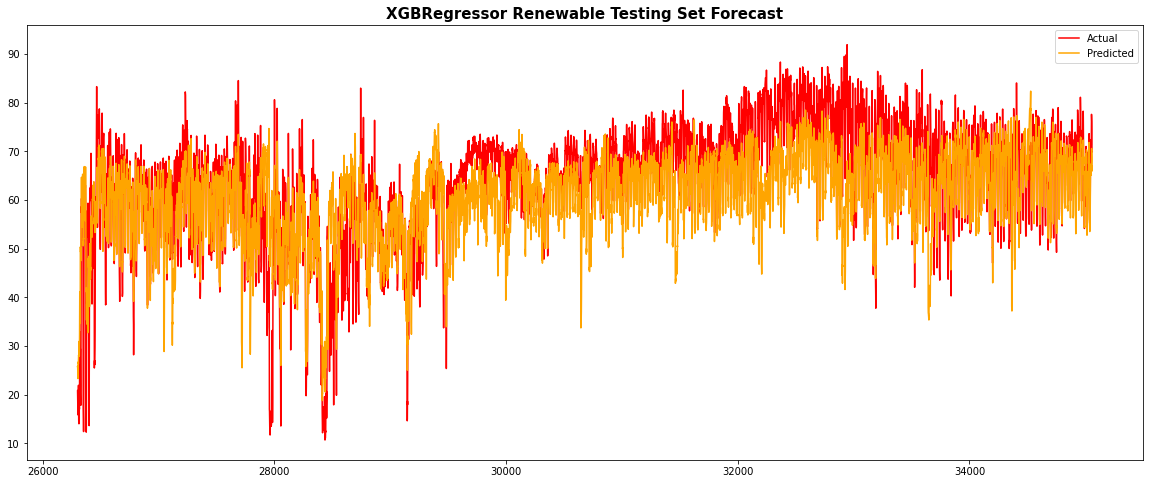

In [290]:
df_plot = pd.DataFrame({'y_test':y_test, 'xgb_pred':rs_model.predict(X_test)})

plt.figure(figsize=(20,8))
df_plot['y_test'].plot(label='Actual',color='red')
df_plot['xgb_pred'].plot(label='Predicted',color = 'orange')
plt.title('XGBRegressor Renewable Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

+ XGBRegressor RandomSearch Using OneHotEncoder

In [291]:
# Pipeline variable for RandomSearch - Using OneHotEncoder
rs_onehot_pipe = make_pipeline(OneHotEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_onehot_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(5,35,5),
              'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
              'xgbregressor__booster':['gbtree','gblinear','dart'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0,1,0.1),
              'xgbregressor__max_delta_step':np.arange(0,1,0.1),
              'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# RandomSearch Model
rs_onehot_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=30,
                                   n_jobs=1)
rs_onehot_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=30, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gblinear'],
                                        'xgbregressor__gamma': array([0.1, 0.2, 0.3, 0.4]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'xgbregressor__max_delta_step': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(10, 30, 3),
                                        'xgbregressor__min_child_weight': range(1, 10),
                                        'xgbregressor__objective': ['reg:squarederror'],
                                   

In [292]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_onehot_model.best_params_))
print("Best cross-validation score: {}".format(rs_onehot_model.best_score_))


Best hyperparams: {'xgbregressor__subsample': 0.7, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 5, 'xgbregressor__max_depth': 13, 'xgbregressor__max_delta_step': 0.7999999999999999, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.1, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.30040628125206714


In [293]:
# Check XGBRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_onehot_model.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_onehot_model.predict(X_test)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test,rs_onehot_model.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_onehot_model.score(X_test, y_test)))

Training MAE: 6.100146215905944
-------------------------------------------------------------------
Validation MAE: 5.810918259767109
-------------------------------------------------------------------
Validation MSE: 71.15363584379944
-------------------------------------------------------------------
Test-set R2 score: 0.5232821761674714


In [263]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.799358      0.014449         0.008393        0.000302   
1        1.256018      0.411850         0.013640        0.006199   
2        0.821748      0.084629         0.008503        0.000300   
3        0.811518      0.044122         0.008615        0.000281   
4        0.778920      0.005629         0.008298        0.000237   
5        0.792630      0.011137         0.008856        0.000486   
6        0.787829      0.020187         0.008280        0.000071   
7        0.774909      0.004294         0.008511        0.000247   
8        0.790424      0.010832         0.008440        0.000206   
9        0.780734      0.013063         0.009113        0.001689   
10       0.774050      0.005540         0.008269        0.000067   
11       0.785695      0.015314         0.008992        0.000721   
12       0.791366      0.006375         0.009815        0.001926   
13       0.942401      0.307560         0.008488        0.000330   
14       0.808830      0.049998         0.009113        0.001605   
15       1.522288      0.264361         0.014152        0.002337   
16       0.914930      0.281840         0.008216        0.000175   
17       0.777039      0.010836         0.008180        0.000034   
18       0.777997      0.007630         0.008472        0.000097   
19       0.781172      0.010095         0.009193        0.001688   
20       0.788757      0.010477         0.008884        0.000744   
21       0.808505      0.076607         0.008431        0.000271   
22       0.775363      0.005460         0.008219        0.000221   
23       0.796034      0.007400         0.008293        0.000073   
24       0.777126      0.008284         0.008323        0.000233   
25       0.780504      0.015641         0.008923        0.001111   
26       0.791779      0.012898         0.008841        0.000581   
27       0.786769      0.011405         0.008359        0.000120   
28       0.783260      0.006846         0.009770        0.003024   
29       2.236916      0.621154         0.016969        0.007216   

   param_xgbregressor__subsample param_xgbregressor__objective  \
0                            1.6              reg:squarederror   
1                            2.5              reg:squarederror   
2                            1.0              reg:squarederror   
3                            0.7              reg:squarederror   
4                            1.0              reg:squarederror   
5                            2.5              reg:squarederror   
6                            1.6              reg:squarederror   
7                            1.9              reg:squarederror   
8                            1.0              reg:squarederror   
9                            1.9              reg:squarederror   
10                           1.9              reg:squarederror   
11                           1.6              reg:squarederror   
12                           2.5              reg:squarederror   
13                           1.6              reg:squarederror   
14                           0.7              reg:squarederror   
15                           0.7              reg:squarederror   
16                           1.9              reg:squarederror   
17                           2.8              reg:squarederror   
18                           1.9              reg:squarederror   
19                           2.8              reg:squarederror   
20                           0.7              reg:squarederror   
21                           1.0              reg:squarederror   
22                           1.6              reg:squarederror   
23                           2.8              reg:squarederror   
24                           2.2              reg:squarederror   
25                           1.3              reg:squarederror   
26                           1.6              reg:squarederror   
27                           1.6              r

### (5) RandomForestRegressor
+ Random forest is an ensemble learning method used for classification, regression analysis, and operates by outputting classification or average predictions (regression analysis) from a number of decision trees constructed during the training process.

#### Default model

In [393]:
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train)
XT_train = ordinal.transform(X_train)
XT_val = ordinal.transform(X_test)

# Assigning model variables
model_rfr = RandomForestRegressor()
#model_xgbr=XGBRegressor()

# Fitting models
model_rfr.fit(XT_train,y_train);
#model_xgbr.fit(XT_train,y_train);

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train,model.predict(XT_train)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test,model.predict(XT_val)))
    print('-------------------------------------------------------------------')
    print('Validation MSE:', mean_squared_error(y_test,model.predict(XT_val)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val,y_test))
    print('===================================================================')
model = [model_rfr]
for m in model:
  check_metrics(m)

RandomForestRegressor()
Training MAE: 0.6430516482263032
-------------------------------------------------------------------
Validation MAE: 5.755192088137917
-------------------------------------------------------------------
Validation MSE: 83.3882103342859
-------------------------------------------------------------------
Validation R2 score: 0.4413125107040594


#### Pipeline and Random search

+ RandomForestRegressor RandomSearch Using OrdinalEncoder

In [394]:
# Pipeline variable for RandomSearch
rs_pipe2 = make_pipeline(OrdinalEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch
rs_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,100,10),
             'randomforestregressor__max_samples':np.arange(0.6,1,0.1),
             'randomforestregressor__max_features':['sqrt'],
             'randomforestregressor__min_samples_split':np.arange(1,5,1)}

# RandomSearch Model
rs_model2 = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=30,
                                  n_jobs=1)

# Model fit
rs_model2.fit(X_train,y_train)
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_model2.best_params_))
print("Best cross-validation score: {}".format(rs_model2.best_score_))


35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib

Best hyperparams: {'randomforestregressor__n_estimators': 35, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__max_samples': 0.8999999999999999, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.310692051641637


In [395]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.308362      0.469637         0.010173        0.002395   
1        0.776546      0.014293         0.008927        0.001534   
2        0.779779      0.011204         0.008660        0.000719   
3        0.937495      0.187365         0.013337        0.009454   
4        0.788700      0.018191         0.009256        0.001418   
5        0.781894      0.011182         0.008345        0.000110   
6        0.838296      0.103710         0.008188        0.000036   
7        0.767137      0.013836         0.009234        0.001540   
8        0.769571      0.006687         0.008069        0.000143   
9        0.770499      0.011097         0.008349        0.000201   
10       0.787326      0.014188         0.009298        0.001497   
11       0.988392      0.345156         0.009129        0.001674   
12       0.790371      0.003245         0.008682        0.000534   
13       0.777717      0.013175         0.008565        0.000653   
14       0.767536      0.013230         0.008073        0.000072   
15       0.765709      0.012717         0.008284        0.000152   
16       0.770001      0.004027         0.008339        0.000104   
17       0.786909      0.012644         0.008695        0.000423   
18       0.786389      0.010825         0.009017        0.000944   
19       0.799084      0.018129         0.008849        0.000734   
20       0.784192      0.025966         0.008461        0.000349   
21       0.790400      0.012226         0.008380        0.000250   
22       0.774118      0.011566         0.008335        0.000195   
23       0.768367      0.003947         0.008404        0.000283   
24       0.776409      0.012652         0.008363        0.000266   
25       0.781330      0.010882         0.008453        0.000246   
26       0.781031      0.010182         0.008537        0.000244   
27       0.785158      0.010818         0.008456        0.000191   
28       0.780810      0.019089         0.008698        0.000840   
29       0.929625      0.318270         0.008210        0.000093   

   param_xgbregressor__subsample param_xgbregressor__objective  \
0                            1.6              reg:squarederror   
1                            2.2              reg:squarederror   
2                            0.7              reg:squarederror   
3                            1.9              reg:squarederror   
4                            1.0              reg:squarederror   
5                            2.2              reg:squarederror   
6                            2.5              reg:squarederror   
7                            1.9              reg:squarederror   
8                            1.0              reg:squarederror   
9                            1.3              reg:squarederror   
10                           2.5              reg:squarederror   
11                           2.2              reg:squarederror   
12                           1.9              reg:squarederror   
13                           1.9              reg:squarederror   
14                           0.7              reg:squarederror   
15                           2.8              reg:squarederror   
16                           1.3              reg:squarederror   
17                           0.7              reg:squarederror   
18                           0.7              reg:squarederror   
19                           2.5              reg:squarederror   
20                           1.3              reg:squarederror   
21                           0.7              reg:squarederror   
22                           1.0              reg:squarederror   
23                           1.9              reg:squarederror   
24                           2.2              reg:squarederror   
25                           1.9              reg:squarederror   
26                           2.5              reg:squarederror   
27                           1.9              r

In [396]:
# Check RandomforestRregressor model metrics
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_model2.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test,rs_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_model2.score(X_test, y_test)))

Training MAE: 0.9235261978512556
-------------------------------------------------------------------
Validation MAE: 7.04289299169682
-------------------------------------------------------------------
Validation MSE: 90.23253925657143
-------------------------------------------------------------------
Test-set R2 score: 0.39545661661329634


+ RandomForestRegressor RandomSearch Using OneHotEncoder

In [397]:
# Pipeline variable for RandomSearch
rs_onehot_pipe2 = make_pipeline(OneHotEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))

# Params for RandomSearch

rs_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,100,10),
             'randomforestregressor__max_samples':np.arange(0.6,1,0.1),
             'randomforestregressor__max_features':['sqrt'],
             'randomforestregressor__min_samples_split':np.arange(1,5,1)}

# RandomSearch Model
rs_onehot_model2 = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=30,
                                  n_jobs=1)

# Model fit
rs_onehot_model2.fit(X_train,y_train)

# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rs_onehot_model2.best_params_))
print("Best cross-validation score: {}".format(rs_onehot_model2.best_score_))


30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib

Best hyperparams: {'randomforestregressor__n_estimators': 35, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__max_samples': 0.8999999999999999, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.310692051641637


In [398]:
import pandas as pd
results = pd.DataFrame(rs_onehot_model2.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.049673      0.003126         0.000000        0.000000   
1        2.175306      0.031861         0.048116        0.003269   
2        2.425700      0.034456         0.048005        0.001189   
3        2.602375      0.042529         0.066567        0.003973   
4        1.396436      0.015680         0.028554        0.001360   
5        0.049181      0.000722         0.000000        0.000000   
6        0.907024      0.009241         0.022190        0.000435   
7        0.051436      0.001275         0.000000        0.000000   
8        2.934816      0.048619         0.073688        0.002967   
9        1.148706      0.022531         0.026839        0.000678   
10       2.624722      0.034889         0.068780        0.002885   
11       0.040787      0.001681         0.000000        0.000000   
12       1.532358      0.011221         0.040113        0.003039   
13       2.912365      0.035823         0.069355        0.002684   
14       1.824923      0.024818         0.048239        0.001770   
15       0.721697      0.006409         0.019570        0.000782   
16       0.049899      0.001233         0.000000        0.000000   
17       1.977964      0.317575         0.045608        0.007951   
18       1.691413      0.025226         0.038462        0.002002   
19       2.474153      0.027724         0.066030        0.003668   
20       4.415885      0.072762         0.097415        0.005546   
21       2.865330      0.020970         0.066901        0.001882   
22       0.053990      0.001672         0.000000        0.000000   
23       3.583233      0.028140         0.076520        0.002095   
24       1.741970      0.017960         0.041025        0.003256   
25       1.093426      0.011107         0.029031        0.001522   
26       0.379551      0.004535         0.014157        0.003060   
27       0.926030      0.007371         0.023976        0.000653   
28       0.729129      0.006622         0.019255        0.000369   
29       1.629101      0.016283         0.041936        0.001235   

   param_randomforestregressor__n_estimators  \
0                                         35   
1                                         55   
2                                         85   
3                                         75   
4                                         95   
5                                         55   
6                                         65   
7                                         55   
8                                         85   
9                                         95   
10                                        85   
11                                        25   
12                                        45   
13                                        65   
14                                        45   
15                                        25   
16                                        65   
17                                        45   
18                                        35   
19                                        65   
20                                        95   
21                                        75   
22                                        75   
23                                        75   
24                                        35   
25                                        45   
26                                        25   
27                                        75   
28                                        25   
29                                        75   

   param_randomforestregressor__min_samples_split  \
0                                               1   
1                                               4   
2                                               3   
3                                               4   
4                                               3   
5                                               1   
6                                  

In [399]:
# Check RandomforestRregressor model metrics
print("============== Check RandomforestRregressor model metrics============")
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score

print('Training MAE:', mean_absolute_error(y_train,rs_onehot_model2.predict(X_train)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test,rs_onehot_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test,rs_onehot_model2.predict(X_test)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rs_onehot_model2.score(X_test, y_test)))

============== Check RandomforestRregressor model metrics============
Training MAE: 0.9235261978512556
-------------------------------------------------------------------
Validation MAE: 7.04289299169682
-------------------------------------------------------------------
Validation MSE: 90.23253925657143
-------------------------------------------------------------------
Test-set R2 score: 0.39545661661329634


### Performance comparison on the test set

+ **R2 Score Comparison**  
  + Linear: 0.5544469
  + Ridge: 0.5544469
  + Lasso: 0.5544445
  + XGBoost: 0.56021788810
  + RandomForest: 0.4436751858269

+ **MSE Comparison**
  + Linear: 66.502073
  + Ridge: 66.502073
  + Lasso: 66.502424
  + XGBoost: 65.6407096105
  + RandomForest: 83.388210334285

+ **MAE Comparison**
  + Linear: 5.5223515
  + Ridge: 5.5223515
  + Lasso: 5.5224709
  + XGBoost: 5.54232626662
  + RandomForest: 5.7551920881379












## 2. Fossil Dataset

+ Split dataset

In [341]:
fossil_dataset_df = pd.read_csv('fossil_dataset.csv')

In [342]:
fossildf = fossil_dataset_df.copy()

In [343]:
fossildf.head()

datetime  generation fossil brown coal/lignite  \
0  2015-01-01 00:00:00                                 329.0   
1  2015-01-01 01:00:00                                 328.0   
2  2015-01-01 02:00:00                                 323.0   
3  2015-01-01 03:00:00                                 254.0   
4  2015-01-01 04:00:00                                 187.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation nuclear  generation other  total load actual  price day ahead  \
0              7096.0              43.0            25385.0            50.10   
1              7096.0              43.0            24382.0            48.10   
2              7099.0              43.0            22734.0            47.33   
3              7098.0              43.0            21286.0            42.27   
4              7097.0              43.0            20264.0            38.41   

   price actual  ...  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0         65.41  ...           1       309      0.0      0.0      0.0   
1         64.92  ...           1       309      0.0      0.0      0.0   
2         64.48  ...           1       273      0.0      0.0      0.0   
3         59.32  ...           1       273      0.0      0.0      0.0   
4         56.04  ...           1       273      0.0      0.0      0.0   

   clouds_all  year  month  day  hour  
0           0  2015      1    1     0  
1           0  2015      1    1     1  
2           0  2015      1    1     2  
3           0  2015      1    1     3  
4           0  2015      1    1     4  

[5 rows x 23 columns]

In [344]:
fossildf['datetime'] = pd.to_datetime(fossildf['datetime'])
fossildf['year'] = fossildf['datetime'].dt.year

In [345]:
fossildf = fossildf.drop(['datetime'], axis=1)

In [346]:
# categorical variable (season) is changed to numerical variable
fossildf = pd.get_dummies(fossildf)

In [347]:
fossil_train = fossildf[(fossildf['year'] == 2015) | (fossildf['year'] == 2016) | (fossildf['year'] == 2017)]
fossil_test = fossildf[fossildf['year'] == 2018]

In [348]:
X_trainval = fossil_train.drop(['price actual'], axis=1)
y_trainval = fossil_train['price actual']

X_test = fossil_test.drop(['price actual'], axis=1)
y_test = fossil_test['price actual']

X_trainval = X_trainval.to_numpy()
y_trainval = y_trainval.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

### (1) Linear Regression

In [349]:
scaler = StandardScaler()
test_mse = []
test_mae = []
scores_val = []

for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
    # get X_train, y_train, X_valid, y_valid 
    X_train = X_trainval[train_idx]
    y_train = y_trainval[train_idx]
    X_valid = X_trainval[val_idx]
    y_valid = y_trainval[val_idx]

    # scale X_train, X_valid  
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)


    # training is performed with the LinearRegression set to the current alpha.
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    

    y_valid_hat = lr.predict(X_valid_scaled)
    scores_val.append(r2_score(y_valid, y_valid_hat))
    
    # get y_test_hat with the trained model & store r2 score in scores_val      
    test_mse.append(mean_squared_error(y_valid, y_valid_hat))
    test_mae.append(mean_absolute_error(y_valid, y_valid_hat))

    # get the cross-validation score
    mean_score = np.mean(scores_val)
    
print(f"mean_score: {mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")

mean_score: 0.6119249818541193, test_mse: 79.11243123530296, test_mae: 6.14677031656004


In [350]:
# scale X_trainval, X_test  
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Linear Regression
lr = LinearRegression()
lr.fit(X_trainval_scaled, y_trainval)

# get the final performance on test set. 
fossil_lr_y_test_hat = lr.predict(X_test_scaled)
fossil_lr_test_score = r2_score(y_test, fossil_lr_y_test_hat)
fossil_lr_mse_score = mean_squared_error(y_test, fossil_lr_y_test_hat)
fossil_lr_mae_score = mean_absolute_error(y_test, fossil_lr_y_test_hat)
print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(fossil_lr_test_score))
print("Linear Regression MSE: {:.7f}".format(fossil_lr_mse_score))
print("Linear Regression MAE: {:.7f}".format(fossil_lr_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5224329
Linear Regression MSE: 71.2803930
Linear Regression MAE: 5.7678460


### (2) Ridge

In [351]:
scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Ridge set to the current alpha.
        ridge = Ridge(alpha = alpha, random_state=0, max_iter=10000)
        ridge.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = ridge.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = alpha

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6119249818626564, test_mse: 79.11243126436985, test_mae: 6.146770321873078
0.6119249818626564
mean_score:0.611924981866817, test_mse: 79.11243127853567, test_mae: 6.146770324462398
0.611924981866817
mean_score:0.6119249818730051, test_mse: 79.11243129960523, test_mae: 6.14677032831363
0.6119249818730051
mean_score:0.6119249818822091, test_mse: 79.11243133094311, test_mae: 6.146770334041765
0.6119249818822091
mean_score:0.6119249818958983, test_mse: 79.11243137755365, test_mae: 6.14677034256152
0.6119249818958983
mean_score:0.611924981916258, test_mse: 79.11243144688002, test_mae: 6.146770355233394
0.611924981916258
mean_score:0.6119249819465392, test_mse: 79.11243154999296, test_mae: 6.14677037408093
0.6119249819465392
mean_score:0.6119249819915755, test_mse: 79.11243170335872, test_mae: 6.146770402113846
0.6119249819915755
mean_score:0.6119249820585544, test_mse: 79.11243193146876, test_mae: 6.14677044380865
0.6119249820585544
mean_score:0.6119249821581626, test_mse: 79.1

In [352]:
ridge_best_parameter = best_parameters

In [353]:
# scale X_trainval, X_test  
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Ridge again with the best hyperparameter
ridge = Ridge(alpha=ridge_best_parameter, random_state=0, max_iter=10000)
ridge.fit(X_trainval_scaled, y_trainval)

# get the final performance on test set. 
fossil_ridge_y_test_hat = ridge.predict(X_test_scaled)
fossil_ridge_test_score = r2_score(y_test, fossil_ridge_y_test_hat)
fossil_ridge_mse_score = mean_squared_error(y_test, fossil_ridge_y_test_hat)
fossil_ridge_mae_score = mean_absolute_error(y_test, fossil_ridge_y_test_hat)
print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(fossil_ridge_test_score))
print("Ridge MSE: {:.7f}".format(fossil_ridge_mse_score))
print("Ridge MAE: {:.7f}".format(fossil_ridge_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5223779
Ridge MSE: 71.2886101
Ridge MAE: 5.7695838


### (3) Lasso

In [354]:
scaler = StandardScaler()
best_score = 0
test_mse = []
test_mae = []

for alpha in np.logspace(-4, 1, 30): # iterate over this candidates using for statement
    scores_val = []
    for train_idx, val_idx in kfold.split(X_trainval, y_trainval): # one more for statement inside the for statement for cross-validation
        # get X_train, y_train, X_valid, y_valid 
        X_train = X_trainval[train_idx]
        y_train = y_trainval[train_idx]
        X_valid = X_trainval[val_idx]
        y_valid = y_trainval[val_idx]

        # scale X_train, X_valid  
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_valid_scaled = scaler.transform(X_valid)


        # training is performed with the Lasso set to the current alpha.
        lasso = Lasso(alpha = alpha, random_state=0, max_iter=10000)
        lasso.fit(X_train_scaled, y_train)
        
    
        y_valid_hat = lasso.predict(X_valid_scaled)
        scores_val.append(r2_score(y_valid, y_valid_hat))
       
        # get y_test_hat with the trained model & store r2 score in scores_val      
        test_mse.append(mean_squared_error(y_valid, y_valid_hat))
        test_mae.append(mean_absolute_error(y_valid, y_valid_hat))
    

    mean_score = np.mean(scores_val) # get the cross-validation score
    print(f"mean_score:{mean_score}, test_mse: {mean_squared_error(y_valid, y_valid_hat)}, test_mae: {mean_absolute_error(y_valid, y_valid_hat)}")
    # When the mean_score is higher than current best score,best_score is updated and the hyperparameter at that time is saved
    if mean_score > best_score:        
        best_score = mean_score
        print(best_score)
        best_parameters = alpha

print("Best score on validation set (r^2): {:.7f}".format(best_score))
print("Best hyperparameters: {}".format(best_parameters))

mean_score:0.6119249960927458, test_mse: 79.11261687542796, test_mae: 6.146736544454553
0.6119249960927458
mean_score:0.6119250016251935, test_mse: 79.11270925457835, test_mae: 6.146720165424003
0.6119250016251935
mean_score:0.6119250081516397, test_mse: 79.11284758284458, test_mae: 6.146695951222081
0.6119250081516397
mean_score:0.6119250140383786, test_mse: 79.11305481184651, test_mae: 6.146659921068826
0.6119250140383786
mean_score:0.6119250142574945, test_mse: 79.11336560542068, test_mae: 6.1466063186523705
0.6119250142574945
mean_score:0.6119249941033589, test_mse: 79.1138383807201, test_mae: 6.146526244337226
mean_score:0.6119249243988809, test_mse: 79.11454616208707, test_mae: 6.146407515513118
mean_score:0.6119247357969675, test_mse: 79.11560466545875, test_mae: 6.146232164693936
mean_score:0.6119242162427609, test_mse: 79.11723598681785, test_mae: 6.145971355757608
mean_score:0.6119230224403654, test_mse: 79.1197570522202, test_mae: 6.14558745726626
mean_score:0.61192021716652

In [355]:
lasso_best_parameter = best_parameters

In [356]:
# scale X_trainval, X_test  
scaler = StandardScaler()
scaler.fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

# train Lasso again with the best hyperparameter
lasso = Lasso(alpha=lasso_best_parameter, random_state=0, max_iter=10000)
lasso.fit(X_trainval_scaled, y_trainval)

# get the final performance on test set. 
fossil_lasso_y_test_hat = lasso.predict(X_test_scaled)
fossil_lasso_test_score = r2_score(y_test, fossil_lasso_y_test_hat)
fossil_lasso_mse_score = mean_squared_error(y_test, fossil_lasso_y_test_hat)
fossil_lasso_mae_score = mean_absolute_error(y_test, fossil_lasso_y_test_hat)

print("==========Test score using Lasso regression==========")
print("Test set score with best hyperparameters: {:.7f}".format(fossil_lasso_test_score))
print("Lasso MSE: {:.7f}".format(fossil_lasso_mse_score))
print("Lasso MAE: {:.7f}".format(fossil_lasso_mae_score))

==========Test score using Lasso regression==========
Test set score with best hyperparameters: 0.5224326
Lasso MSE: 71.2804477
Lasso MAE: 5.7676529


### (4) XGBRegressor

In [388]:
train_f = fossil_dataset_df[(fossil_dataset_df['year'] == 2015) | (fossil_dataset_df['year'] == 2016) | (fossil_dataset_df['year'] == 2017)]
test_f = fossil_dataset_df[fossil_dataset_df['year'] == 2018]
X_train_f = train_f.drop(['price actual'],axis=1)
y_train_f = train_f['price actual']

X_test_f = test_f.drop(['price actual'],axis=1)
y_test_f = test_f['price actual']

In [389]:
print(X_train_f.shape)
print(y_train_f.shape)
print(X_test_f.shape)
print(y_test_f.shape)

(26301, 22)
(26301,)
(8759, 22)
(8759,)


In [359]:
X_train_f.dtypes

datetime                                 object
generation fossil brown coal/lignite    float64
generation fossil gas                   float64
generation fossil hard coal             float64
generation fossil oil                   float64
generation nuclear                      float64
generation other                        float64
total load actual                       float64
price day ahead                         float64
temp                                    float64
pressure                                  int64
humidity                                  int64
wind_speed                                int64
wind_deg                                  int64
rain_1h                                 float64
rain_3h                                 float64
snow_3h                                 float64
clouds_all                                int64
year                                      int64
month                                     int64
day                                     

#### Default model 

In [390]:
###### fossil
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train_f)
XT_train_f = ordinal.transform(X_train_f)
XT_val_f = ordinal.transform(X_test_f)

# Assigning model variables
model_xgbr_f=XGBRegressor()

# Fitting models
model_xgbr_f.fit(XT_train_f,y_train_f)

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train_f,model.predict(XT_train_f)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test_f,model.predict(XT_val_f)))
    print('-------------------------------------------------------------------')
    print('Validation MSE:', mean_squared_error(y_test_f,model.predict(XT_val_f)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val_f,y_test_f))
    print('===================================================================')
model = [model_xgbr_f]
for m in model:
  check_metrics(m)

[04:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor()
Training MAE: 3.292131495597059
-------------------------------------------------------------------
Validation MAE: 7.227092576151583
-------------------------------------------------------------------
Validation MSE: 85.9040027149971
-------------------------------------------------------------------
Validation R2 score: 0.42445710964514627


#### Pipeline and Random search

+ XGBRegressor RandomSearch Using OrdinalEncoder

In [361]:
# Pipeline variable for RandomSearch - Using OrdinalEncoder
xgb_f_pipe = make_pipeline(OrdinalEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(10,30,3),
              'xgbregressor__learning_rate':np.arange(0.2,0.9,0.1),
              'xgbregressor__booster':['gblinear'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0.1,0.5,0.1),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.1),
              'xgbregressor__subsample':np.arange(0.7,3,0.3)}

# RandomSearch Model
xgb_f_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=30,
                                   n_jobs=1)
xgb_f_model.fit(X_train_f, y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=30, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gblinear'],
                                        'xgbregressor__gamma': array([0.1, 0.2, 0.3, 0.4]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'xgbregressor__max_delta_step': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(10, 30, 3),
                                        'xgbregressor__min_child_weight': range(1, 10),
                                        'xgbregressor__objective': ['reg:squarederror'],
                                   

In [362]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(xgb_f_model.best_params_))
print("Best cross-validation score: {}".format(xgb_f_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,xgb_f_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,xgb_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test_f,xgb_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(xgb_f_model.score(X_test_f, y_test_f)))

Best hyperparams: {'xgbregressor__subsample': 1.3, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 4, 'xgbregressor__max_depth': 10, 'xgbregressor__max_delta_step': 0.5, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.1, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.17344045838209265
Training MAE: 6.492997395909335
-------------------------------------------------------------------
Validation MAE: 6.038632642055894
-------------------------------------------------------------------
Validation MSE: 73.8510388125766
-------------------------------------------------------------------
Test-set R2 score: 0.5052100136135054


In [363]:
import pandas as pd
results = pd.DataFrame(xgb_f_model.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.756394      0.012554         0.009390        0.000267   
1        0.761751      0.087560         0.012271        0.005954   
2        0.761228      0.021399         0.009943        0.000600   
3        0.776783      0.012119         0.009810        0.000297   
4        0.908790      0.236887         0.012662        0.003618   
5        1.183037      0.406442         0.011983        0.002620   
6        0.753327      0.024258         0.009202        0.000056   
7        0.732537      0.016251         0.009930        0.001564   
8        0.721100      0.012370         0.009403        0.000277   
9        0.729122      0.020984         0.009499        0.000236   
10       0.752017      0.010212         0.009602        0.000272   
11       0.742139      0.007685         0.010063        0.000986   
12       0.743899      0.007661         0.009375        0.000157   
13       0.746778      0.010992         0.009389        0.000251   
14       0.743495      0.014930         0.009460        0.000137   
15       0.731802      0.005487         0.009531        0.000191   
16       0.725980      0.004778         0.009876        0.000987   
17       0.731607      0.006421         0.009507        0.000200   
18       0.736723      0.006962         0.010046        0.000805   
19       0.737692      0.008175         0.009466        0.000161   
20       0.740094      0.008800         0.009348        0.000245   
21       0.741996      0.004080         0.009644        0.000272   
22       0.743023      0.020149         0.010919        0.003300   
23       0.851444      0.209094         0.010862        0.001801   
24       0.923333      0.240392         0.010195        0.001932   
25       0.745022      0.021181         0.009761        0.000319   
26       0.751463      0.016589         0.009648        0.000223   
27       0.756947      0.014330         0.011319        0.002348   
28       0.753089      0.005430         0.009534        0.000161   
29       0.745538      0.009565         0.009829        0.000609   

   param_xgbregressor__subsample param_xgbregressor__objective  \
0                            2.5              reg:squarederror   
1                            2.8              reg:squarederror   
2                            1.3              reg:squarederror   
3                            1.3              reg:squarederror   
4                            2.2              reg:squarederror   
5                            2.5              reg:squarederror   
6                            1.3              reg:squarederror   
7                            1.6              reg:squarederror   
8                            1.9              reg:squarederror   
9                            1.6              reg:squarederror   
10                           1.6              reg:squarederror   
11                           1.9              reg:squarederror   
12                           2.5              reg:squarederror   
13                           2.8              reg:squarederror   
14                           1.0              reg:squarederror   
15                           1.3              reg:squarederror   
16                           1.9              reg:squarederror   
17                           2.2              reg:squarederror   
18                           1.0              reg:squarederror   
19                           2.8              reg:squarederror   
20                           1.0              reg:squarederror   
21                           1.9              reg:squarederror   
22                           1.6              reg:squarederror   
23                           0.7              reg:squarederror   
24                           1.3              reg:squarederror   
25                           1.3              reg:squarederror   
26                           1.0              reg:squarederror   
27                           1.3              r

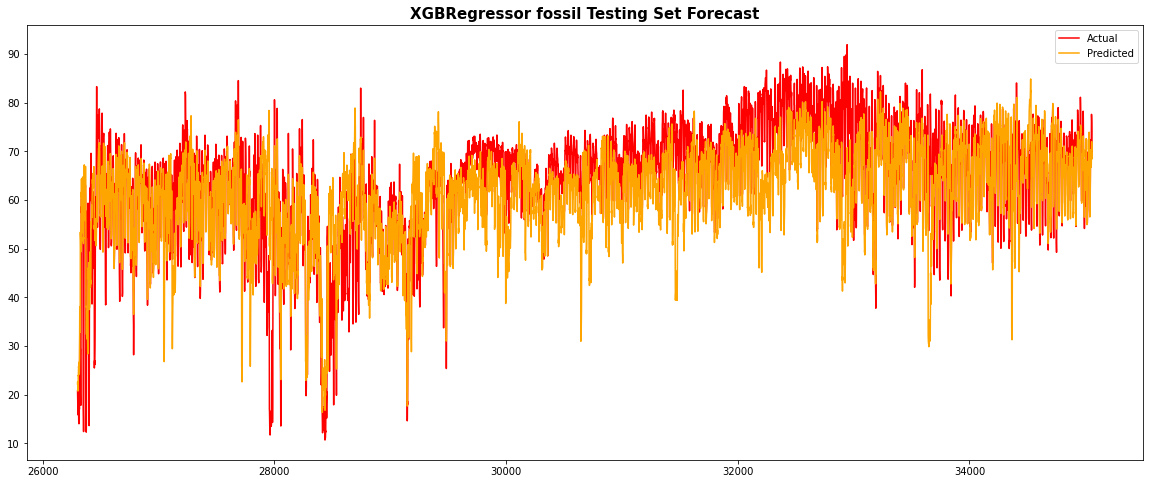

In [364]:
df_plot = pd.DataFrame({'y_test':y_test_f, 'rs_pred':xgb_f_model.predict(X_test_f)})

plt.figure(figsize=(20,8))

df_plot['y_test'].plot(label='Actual',color='red')
df_plot['rs_pred'].plot(label='Predicted',color = 'orange')
plt.title('XGBRegressor fossil Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

+ XGBRegressor RandomSearch Using OneHotEncoder

In [365]:
# Pipeline variable for RandomSearch - Using Onehotencoder
xgb_f_o_pipe = make_pipeline(OneHotEncoder(),
                            XGBRegressor(random_state=42,
                                         n_jobs=1))

# Params for RandomSearch
rs_param_grid = {'xgbregressor__objective':['reg:squarederror'],
              'xgbregressor__max_depth':range(10,30,3),
              'xgbregressor__learning_rate':np.arange(0.2,0.9,0.1),
              'xgbregressor__booster':['gblinear'],
              'xgbregressor__min_child_weight':range(1,10,1),
              'xgbregressor__gamma':np.arange(0.1,0.5,0.1),
              'xgbregressor__max_delta_step':np.arange(0.5,1,0.1),
              'xgbregressor__subsample':np.arange(0.7,3,0.3)}

# RandomSearch Model
xgb_f_o_model = RandomizedSearchCV(rs_pipe,
                                   param_distributions = rs_param_grid,
                                   n_iter=20,
                                   n_jobs=1)
xgb_f_o_model.fit(X_train_f, y_train_f)

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('xgbregressor',
                                              XGBRegressor(random_state=42))]),
                   n_iter=20, n_jobs=1,
                   param_distributions={'xgbregressor__booster': ['gblinear'],
                                        'xgbregressor__gamma': array([0.1, 0.2, 0.3, 0.4]),
                                        'xgbregressor__learning_rate': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
                                        'xgbregressor__max_delta_step': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'xgbregressor__max_depth': range(10, 30, 3),
                                        'xgbregressor__min_child_weight': range(1, 10),
                                        'xgbregressor__objective': ['reg:squarederror'],
                                   

In [366]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(xgb_f_o_model.best_params_))
print("Best cross-validation score: {}".format(xgb_f_o_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,xgb_f_o_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,xgb_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test_f,xgb_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(xgb_f_o_model.score(X_test_f, y_test_f)))

Best hyperparams: {'xgbregressor__subsample': 2.8000000000000007, 'xgbregressor__objective': 'reg:squarederror', 'xgbregressor__min_child_weight': 1, 'xgbregressor__max_depth': 22, 'xgbregressor__max_delta_step': 0.7999999999999999, 'xgbregressor__learning_rate': 0.8000000000000003, 'xgbregressor__gamma': 0.2, 'xgbregressor__booster': 'gblinear'}
Best cross-validation score: 0.17344045838209265
Training MAE: 6.492997395909335
-------------------------------------------------------------------
Validation MAE: 6.038632642055894
-------------------------------------------------------------------
Validation MSE: 73.8510388125766
-------------------------------------------------------------------
Test-set R2 score: 0.5052100136135054


In [367]:
import pandas as pd
results = pd.DataFrame(xgb_f_o_model.cv_results_)
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.746176      0.012137         0.009728        0.000508   
1        0.731324      0.006346         0.009438        0.000097   
2        0.724899      0.019773         0.009427        0.000278   
3        0.743490      0.009751         0.009505        0.000175   
4        0.748779      0.014969         0.009651        0.000352   
5        0.746584      0.016557         0.009643        0.000174   
6        0.756658      0.020291         0.009926        0.000510   
7        0.767700      0.012894         0.010359        0.001175   
8        0.762345      0.006130         0.009774        0.000386   
9        0.762859      0.010483         0.010069        0.000798   
10       0.758408      0.008536         0.010527        0.002078   
11       0.746730      0.004293         0.009654        0.000162   
12       0.748557      0.005346         0.009639        0.000219   
13       0.744305      0.011389         0.009728        0.000522   
14       0.731090      0.005114         0.009318        0.000198   
15       0.726916      0.012415         0.009276        0.000089   
16       0.731312      0.009181         0.009393        0.000370   
17       0.740310      0.013870         0.009473        0.000292   
18       0.730301      0.011972         0.009655        0.000445   
19       0.755973      0.018556         0.009840        0.000464   

   param_xgbregressor__subsample param_xgbregressor__objective  \
0                            2.8              reg:squarederror   
1                            2.5              reg:squarederror   
2                            1.3              reg:squarederror   
3                            2.5              reg:squarederror   
4                            2.2              reg:squarederror   
5                            1.9              reg:squarederror   
6                            1.6              reg:squarederror   
7                            1.6              reg:squarederror   
8                            1.6              reg:squarederror   
9                            0.7              reg:squarederror   
10                           1.6              reg:squarederror   
11                           1.3              reg:squarederror   
12                           1.9              reg:squarederror   
13                           1.3              reg:squarederror   
14                           0.7              reg:squarederror   
15                           2.8              reg:squarederror   
16                           1.6              reg:squarederror   
17                           1.6              reg:squarederror   
18                           2.8              reg:squarederror   
19                           2.5              reg:squarederror   

   param_xgbregressor__min_child_weight param_xgbregressor__max_depth  \
0                                     1                            22   
1                                     5                            10   
2                                     3                            19   
3                                     8                            16   
4                                     1                            25   
5                                     4                            13   
6                                     7                            25   
7                                     8                            22   
8                                     8                            19   
9                                     2                            22   
10                                    7                            16   
11                                    8                            25   
12                                    6                            25   
13                                    7                            16   
14                                    3                            19   
15                  

### (5) RandomForestRegressor
+ Random forest is an ensemble learning method used for classification, regression analysis, and operates by outputting classification or average predictions (regression analysis) from a number of decision trees constructed during the training process.

#### Default model

In [368]:
###### fossil
# Ordinal Encoder to transform Seasons column
ordinal = OrdinalEncoder()
ordinal_fit = ordinal.fit(X_train_f)
XT_train_f = ordinal.transform(X_train_f)
XT_val_f = ordinal.transform(X_test_f)

# Assigning model variables
model_rfr_f = RandomForestRegressor()

# Fitting models
model_rfr_f.fit(XT_train_f,y_train_f)

# Def to check model metrics of baseline performance
def check_metrics(model):
    print(model)
    print('===================================================================')
    print('Training MAE:', mean_absolute_error(y_train_f,model.predict(XT_train_f)))
    print('-------------------------------------------------------------------')
    print('Validation MAE:', mean_absolute_error(y_test_f,model.predict(XT_val_f)))
    print('-------------------------------------------------------------------')
    print('Validation MSE:', mean_squared_error(y_test_f,model.predict(XT_val_f)))
    print('-------------------------------------------------------------------')
    print('Validation R2 score:', model.score(XT_val_f,y_test_f))
    print('===================================================================')
model = [model_rfr_f]
for m in model:
  check_metrics(m)

RandomForestRegressor()
Training MAE: 0.6005414356868565
-------------------------------------------------------------------
Validation MAE: 7.224644194542755
-------------------------------------------------------------------
Validation MSE: 83.03556372257903
-------------------------------------------------------------------
Validation R2 score: 0.4436751858269986


#### Pipeline and Random search

+ RandomForestRegressor RandomSearch Using OrdinalEncoder

In [369]:
# Pipeline variable for RandomSearch
rf_f_pipe = make_pipeline(OrdinalEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))


# Params for RandomSearch
rs_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,100,10),
             'randomforestregressor__max_samples':np.arange(0.6,1,0.1),
             'randomforestregressor__max_features':['sqrt'],
             'randomforestregressor__min_samples_split':np.arange(1,5,1)}


# RandomSearch Model
rf_f_model = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=30,
                                  n_jobs=1)

# Model fit
rf_f_model.fit(X_train_f,y_train_f)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=30, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt'],
                                        'randomforestregressor__max_samples': array([0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([1, 2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 100, 10)})

In [370]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rf_f_model.best_params_))
print("Best cross-validation score: {}".format(rf_f_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,rf_f_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,rf_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test_f,rf_f_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rf_f_model.score(X_test_f, y_test_f)))

Best hyperparams: {'randomforestregressor__n_estimators': 85, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__max_samples': 0.6, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.4602743921246077
Training MAE: 1.1450835008970017
-------------------------------------------------------------------
Validation MAE: 6.537224913358425
-------------------------------------------------------------------
Validation MSE: 75.56525157458154
-------------------------------------------------------------------
Test-set R2 score: 0.4937250660377708


+ RandomForestRegressor RandomSearch Using OneHotEncoder

In [371]:
# Pipeline variable for RandomSearch
rf_f_o_pipe = make_pipeline(OneHotEncoder(),
                            RandomForestRegressor(random_state=42,
                                                  n_jobs=1))


# Params for RandomSearch
rs_param_grid2 = {'randomforestregressor__max_depth':range(5,35,5),
             'randomforestregressor__n_estimators':range(25,100,10),
             'randomforestregressor__max_samples':np.arange(0.6,1,0.1),
             'randomforestregressor__max_features':['sqrt'],
             'randomforestregressor__min_samples_split':np.arange(1,5,1)}


# RandomSearch Model
rf_f_o_model = RandomizedSearchCV(rs_pipe2,
                                  param_distributions=rs_param_grid2,
                                  n_iter=30,
                                  n_jobs=1)

# Model fit
rf_f_o_model.fit(X_train_f,y_train_f)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/

RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(n_jobs=1,
                                                                    random_state=42))]),
                   n_iter=30, n_jobs=1,
                   param_distributions={'randomforestregressor__max_depth': range(5, 35, 5),
                                        'randomforestregressor__max_features': ['sqrt'],
                                        'randomforestregressor__max_samples': array([0.6, 0.7, 0.8, 0.9]),
                                        'randomforestregressor__min_samples_split': array([1, 2, 3, 4]),
                                        'randomforestregressor__n_estimators': range(25, 100, 10)})

In [372]:
# check best hyperparms, best cross-validation score
print("Best hyperparams: {}".format(rf_f_o_model.best_params_))
print("Best cross-validation score: {}".format(rf_f_o_model.best_score_))
# check model metrics
print('Training MAE:', mean_absolute_error(y_train_f,rf_f_o_model.predict(X_train_f)))
print('-------------------------------------------------------------------')
print('Validation MAE:', mean_absolute_error(y_test_f,rf_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print('Validation MSE:', mean_squared_error(y_test_f,rf_f_o_model.predict(X_test_f)))
print('-------------------------------------------------------------------')
print("Test-set R2 score: {}".format(rf_f_o_model.score(X_test_f, y_test_f)))

Best hyperparams: {'randomforestregressor__n_estimators': 75, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__max_samples': 0.6, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 30}
Best cross-validation score: 0.46317035719167043
Training MAE: 1.2592448242740462
-------------------------------------------------------------------
Validation MAE: 7.173849722677054
-------------------------------------------------------------------
Validation MSE: 86.86645940137154
-------------------------------------------------------------------
Test-set R2 score: 0.4180088058920012


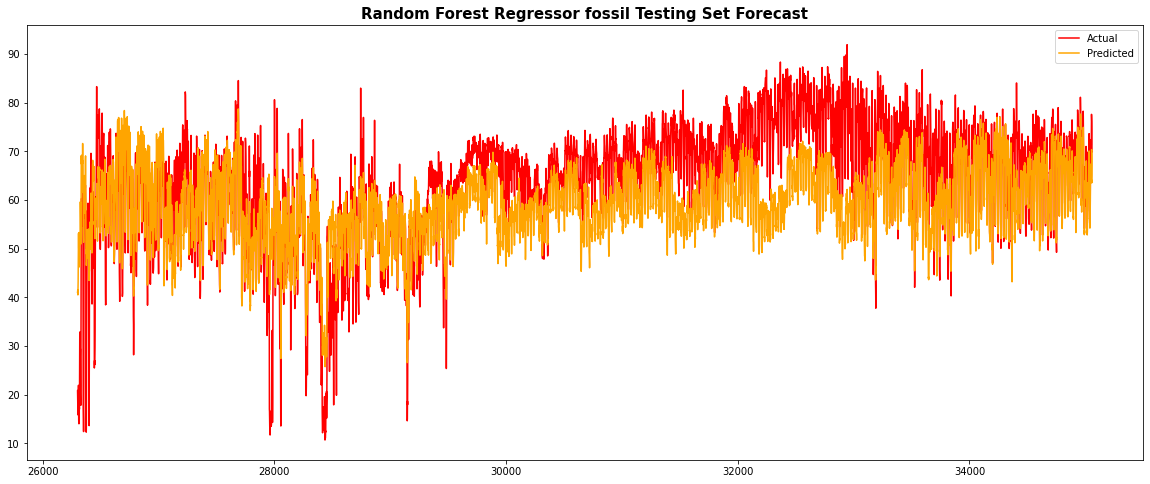

In [373]:
df_plot = pd.DataFrame({'y_test':y_test_f, 'rs_pred':rf_f_o_model.predict(X_test_f)})

plt.figure(figsize=(20,8))

df_plot['y_test'].plot(label='Actual',color='red')
df_plot['rs_pred'].plot(label='Predicted',color = 'orange')
plt.title('Random Forest Regressor fossil Testing Set Forecast', weight='bold', fontsize=15)
plt.legend()
plt.show()

### Performance comparison on the test set

+ **R2 Score Comparison**  
  + Linear: 0.5224329
  + Ridge: 0.5223779
  + Lasso: 0.5224326
  + XGBoost: 0.50521001361
  + RandomForest: 0.4937250660377

+ **MSE Comparison**
  + Linear: 71.280393
  + Ridge: 71.288610
  + Lasso: 71.280447
  + XGBoost: 73.8510388125
  + RandomForest: 75.565251574581

+ **MAE Comparison**
  + Linear: 5.7678460
  + Ridge: 5.7695838
  + Lasso: 5.7676529
  + XGBoost: 6.03863264205
  + RandomForest: 6.5372249133584


# Visualization

In [374]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.1 MB/s 


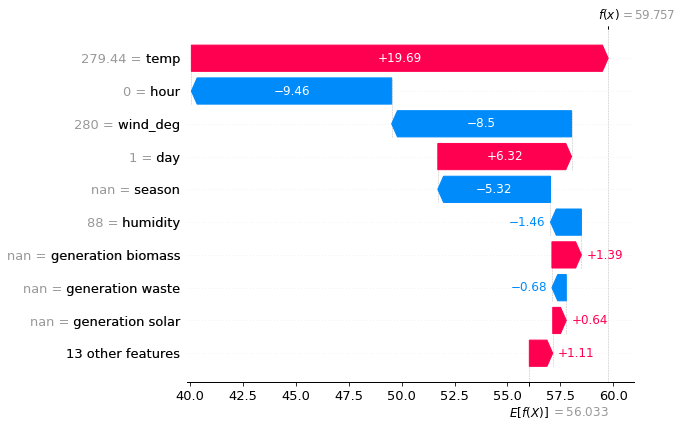

In [385]:
import shap
#Set samp variable to show features when plotting 
samp = pd.DataFrame(XT_val,columns=ordinal_fit.get_feature_names())
# Shap waterfall plot showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values=explainer(samp.head(1))
shap.plots.waterfall(shap_values[0])

In [386]:
# Shap force plot also showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values = explainer.shap_values(samp.head(1))
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values=shap_values,
                features=samp.head(1))

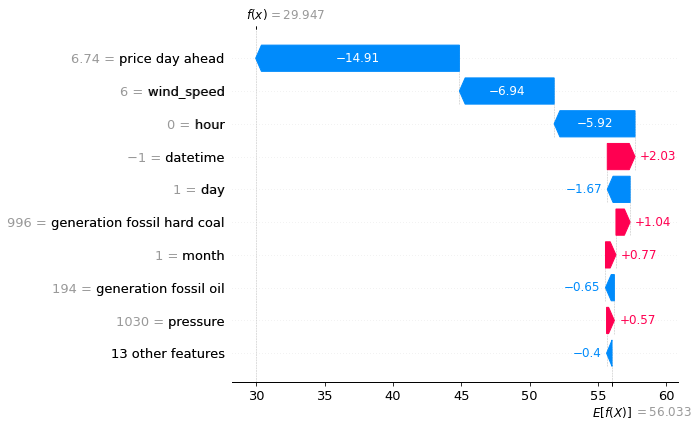

In [391]:
import shap
# Set samp variable to show features by a plot 
samp = pd.DataFrame(XT_val_f,columns=ordinal_fit.get_feature_names())
# Feature importance
explainer = shap.TreeExplainer(model_xgbr_f)
shap_values=explainer(samp.head(1))
shap.plots.waterfall(shap_values[0])

In [392]:
# Shap force plot also showing feature importance
explainer = shap.TreeExplainer(model_xgbr_f)
shap_values = explainer.shap_values(samp.head(1))
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values=shap_values,
                features=samp.head(1))